In [1]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Flatten, BatchNormalization, Dropout, GRU
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import module
import gc
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
np.random.randint(10)

9

In [3]:
countriesOfInterest = {"HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO', 'EC', 'AU', 'NZ'}
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]
#countriesOfInterest = list(countriesOfInterest & {"ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"})

enc = OneHotEncoder()
enc.fit(np.array(countriesOfInterest).reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [4]:
seconds = 10
samplerate = 10
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(1, 1, 1, 1, seconds, samplerate, countriesOfInterest,
               enc, verbose = 0)
print("train", np.sum(train_labels, axis = 0))

train [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Fit model

In [5]:
input_shape=(train_x.shape[1], train_x.shape[2])
input_shape

(100, 25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 100, 25)           100       
_________________________________________________________________
lstm (LSTM)                  (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 8)            32        
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                1600      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                1

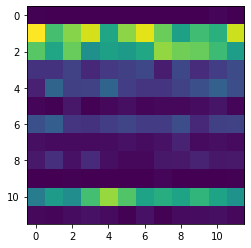

24000/24000 [==============================] - 1s 57us/sample


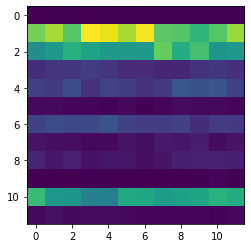

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 7s 305us/sample - loss: 2.5207 - acc: 0.1079 - val_loss: 2.4859 - val_acc: 0.1075
Epoch 12/12
24000/24000 [==============================] - 5s 201us/sample - loss: 2.4990 - acc: 0.1143 - val_loss: 2.4849 - val_acc: 0.1138
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 7s 303us/sample - loss: 2.4994 - acc: 0.1095 - val_loss: 2.4842 - val_acc: 0.0902
Epoch 14/14
24000/24000 [==============================] - 5s 211us/sample - loss: 2.4819 - acc: 0.1189 - val_loss: 2.4834 - val_acc: 0.0917
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 7s 311us/sample - loss: 2.4859 - acc: 0.1147 - val_loss: 2.4807 - val_acc: 0.0900
Epoch 16/16
24000/24000 [==============================] - 5s 215us/sample - loss: 2.4724 - acc: 0.1195 - val_loss: 2.4804 - val_acc: 0.0902
Train o

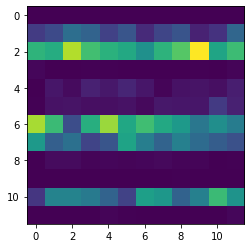

24000/24000 [==============================] - 1s 57us/sample


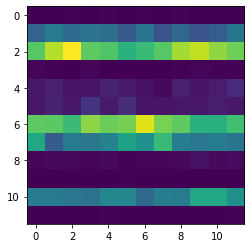

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 7s 300us/sample - loss: 2.4601 - acc: 0.1273 - val_loss: 2.4725 - val_acc: 0.1142
Epoch 22/22
24000/24000 [==============================] - 5s 209us/sample - loss: 2.4477 - acc: 0.1338 - val_loss: 2.4702 - val_acc: 0.1119
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4661 - acc: 0.1208 - val_loss: 2.4829 - val_acc: 0.0938
Epoch 24/24
24000/24000 [==============================] - 5s 216us/sample - loss: 2.4535 - acc: 0.1280 - val_loss: 2.4832 - val_acc: 0.0948
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4499 - acc: 0.1279 - val_loss: 2.4797 - val_acc: 0.1177
Epoch 26/26
24000/24000 [==============================] - 5s 218us/sample - loss: 2.4379 - acc: 0.1370 - val_loss: 2.4783 - val_acc: 0.1154
Train o

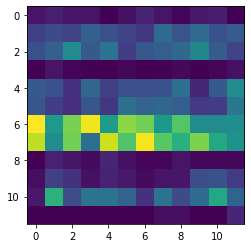

24000/24000 [==============================] - 1s 61us/sample


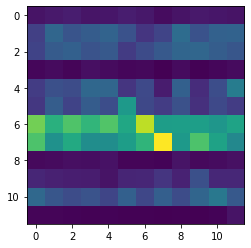

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 7s 312us/sample - loss: 2.4568 - acc: 0.1265 - val_loss: 2.4703 - val_acc: 0.1088
Epoch 32/32
24000/24000 [==============================] - 5s 228us/sample - loss: 2.4454 - acc: 0.1328 - val_loss: 2.4707 - val_acc: 0.1138
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 8s 313us/sample - loss: 2.4438 - acc: 0.1358 - val_loss: 2.4754 - val_acc: 0.1063
Epoch 34/34
24000/24000 [==============================] - 5s 221us/sample - loss: 2.4332 - acc: 0.1410 - val_loss: 2.4766 - val_acc: 0.1104
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 8s 314us/sample - loss: 2.4484 - acc: 0.1325 - val_loss: 2.4583 - val_acc: 0.1240
Epoch 36/36
24000/24000 [==============================] - 5s 222us/sample - loss: 2.4359 - acc: 0.1361 - val_loss: 2.4536 - val_acc: 0.1240
Train o

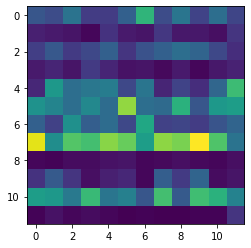

24000/24000 [==============================] - 1s 60us/sample


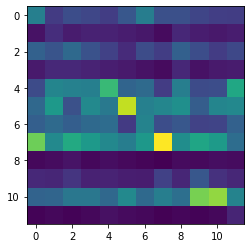

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 8s 316us/sample - loss: 2.4407 - acc: 0.1434 - val_loss: 2.4498 - val_acc: 0.1235
Epoch 42/42
24000/24000 [==============================] - 5s 220us/sample - loss: 2.4285 - acc: 0.1498 - val_loss: 2.4529 - val_acc: 0.1296
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 7s 308us/sample - loss: 2.4348 - acc: 0.1367 - val_loss: 2.4552 - val_acc: 0.1181
Epoch 44/44
24000/24000 [==============================] - 5s 220us/sample - loss: 2.4221 - acc: 0.1452 - val_loss: 2.4537 - val_acc: 0.1215
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 7s 309us/sample - loss: 2.4411 - acc: 0.1411 - val_loss: 2.4404 - val_acc: 0.1458
Epoch 46/46
24000/24000 [==============================] - 5s 217us/sample - loss: 2.4288 - acc: 0.1485 - val_loss: 2.4423 - val_acc: 0.1385
Train o

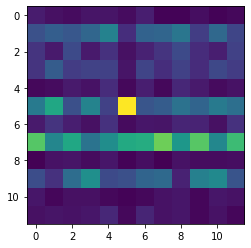

24000/24000 [==============================] - 1s 61us/sample


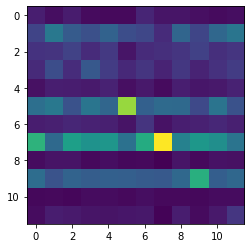

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 8s 319us/sample - loss: 2.4346 - acc: 0.1381 - val_loss: 2.4430 - val_acc: 0.1219
Epoch 52/52
24000/24000 [==============================] - 5s 223us/sample - loss: 2.4227 - acc: 0.1462 - val_loss: 2.4460 - val_acc: 0.1156
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 8s 320us/sample - loss: 2.4383 - acc: 0.1435 - val_loss: 2.4335 - val_acc: 0.1477
Epoch 54/54
24000/24000 [==============================] - 5s 224us/sample - loss: 2.4256 - acc: 0.1470 - val_loss: 2.4378 - val_acc: 0.1444
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 8s 316us/sample - loss: 2.4245 - acc: 0.1426 - val_loss: 2.4196 - val_acc: 0.1475
Epoch 56/56
24000/24000 [==============================] - 5s 226us/sample - loss: 2.4119 - acc: 0.1495 - val_loss: 2.4226 - val_acc: 0.1454
Train o

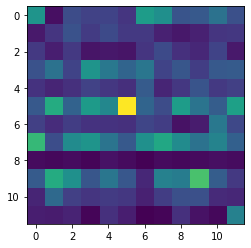

24000/24000 [==============================] - 1s 62us/sample


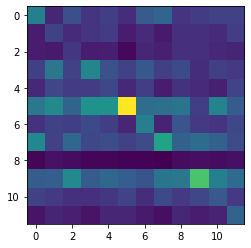

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 8s 323us/sample - loss: 2.4256 - acc: 0.1516 - val_loss: 2.4190 - val_acc: 0.1410
Epoch 62/62
24000/24000 [==============================] - 6s 236us/sample - loss: 2.4114 - acc: 0.1582 - val_loss: 2.4225 - val_acc: 0.1446
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 8s 322us/sample - loss: 2.4192 - acc: 0.1511 - val_loss: 2.4133 - val_acc: 0.1467
Epoch 64/64
24000/24000 [==============================] - 6s 230us/sample - loss: 2.4047 - acc: 0.1562 - val_loss: 2.4109 - val_acc: 0.1446
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 8s 326us/sample - loss: 2.4215 - acc: 0.1536 - val_loss: 2.4043 - val_acc: 0.1556
Epoch 66/66
24000/24000 [==============================] - 5s 228us/sample - loss: 2.4093 - acc: 0.1550 - val_loss: 2.4078 - val_acc: 0.1535
Train o

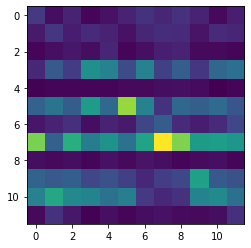

24000/24000 [==============================] - 1s 61us/sample


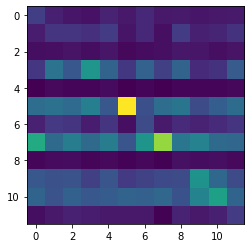

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 8s 327us/sample - loss: 2.4033 - acc: 0.1611 - val_loss: 2.4401 - val_acc: 0.1352
Epoch 72/72
24000/24000 [==============================] - 5s 226us/sample - loss: 2.3889 - acc: 0.1678 - val_loss: 2.4414 - val_acc: 0.1333
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 8s 319us/sample - loss: 2.4026 - acc: 0.1616 - val_loss: 2.4188 - val_acc: 0.1402
Epoch 74/74
24000/24000 [==============================] - 6s 236us/sample - loss: 2.3918 - acc: 0.1654 - val_loss: 2.4190 - val_acc: 0.1408
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 8s 327us/sample - loss: 2.4211 - acc: 0.1462 - val_loss: 2.4207 - val_acc: 0.1490
Epoch 76/76
24000/24000 [==============================] - 6s 231us/sample - loss: 2.4092 - acc: 0.1513 - val_loss: 2.4215 - val_acc: 0.1467
Train o

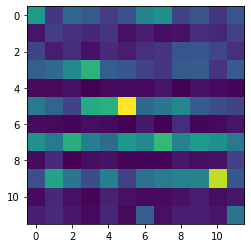

24000/24000 [==============================] - 2s 64us/sample


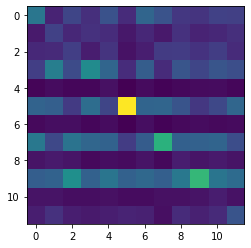

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 8s 331us/sample - loss: 2.3992 - acc: 0.1612 - val_loss: 2.4407 - val_acc: 0.1421
Epoch 82/82
24000/24000 [==============================] - 6s 235us/sample - loss: 2.3859 - acc: 0.1714 - val_loss: 2.4435 - val_acc: 0.1394
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 8s 331us/sample - loss: 2.4118 - acc: 0.1557 - val_loss: 2.4302 - val_acc: 0.1465
Epoch 84/84
24000/24000 [==============================] - 6s 231us/sample - loss: 2.3983 - acc: 0.1599 - val_loss: 2.4320 - val_acc: 0.1527
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 8s 339us/sample - loss: 2.4078 - acc: 0.1571 - val_loss: 2.4027 - val_acc: 0.1617
Epoch 86/86
24000/24000 [==============================] - 6s 241us/sample - loss: 2.3948 - acc: 0.1631 - val_loss: 2.4075 - val_acc: 0.1608
Train o

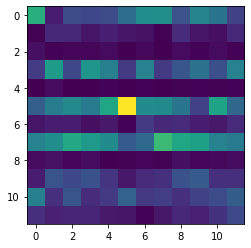

24000/24000 [==============================] - 2s 66us/sample


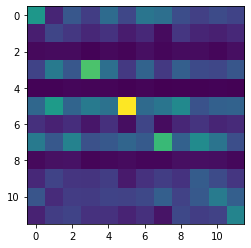

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 8s 338us/sample - loss: 2.4037 - acc: 0.1618 - val_loss: 2.4097 - val_acc: 0.1412
Epoch 92/92
24000/24000 [==============================] - 7s 275us/sample - loss: 2.3895 - acc: 0.1671 - val_loss: 2.4101 - val_acc: 0.1446
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 8s 341us/sample - loss: 2.3863 - acc: 0.1741 - val_loss: 2.4226 - val_acc: 0.1525
Epoch 94/94
24000/24000 [==============================] - 6s 242us/sample - loss: 2.3723 - acc: 0.1818 - val_loss: 2.4274 - val_acc: 0.1523
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 8s 341us/sample - loss: 2.3996 - acc: 0.1594 - val_loss: 2.4324 - val_acc: 0.1646
Epoch 96/96
24000/24000 [==============================] - 6s 248us/sample - loss: 2.3854 - acc: 0.1659 - val_loss: 2.4295 - val_acc: 0.1598
Train o

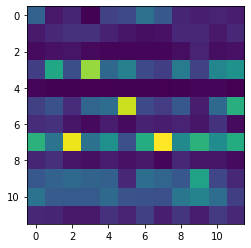

24000/24000 [==============================] - 2s 66us/sample


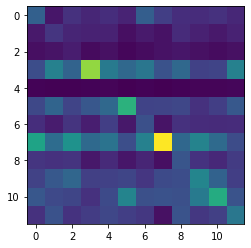

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 100, 25)           100       
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 16)           64        
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)               

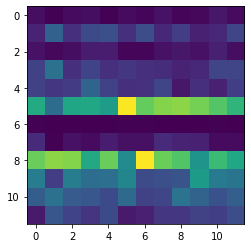

24000/24000 [==============================] - 2s 84us/sample


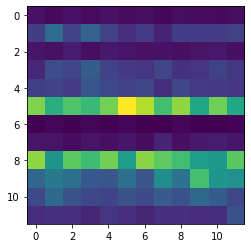

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 10s 402us/sample - loss: 2.5123 - acc: 0.1093 - val_loss: 2.4719 - val_acc: 0.1223
Epoch 12/12
24000/24000 [==============================] - 7s 304us/sample - loss: 2.4867 - acc: 0.1197 - val_loss: 2.4706 - val_acc: 0.1262
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 10s 403us/sample - loss: 2.5007 - acc: 0.1147 - val_loss: 2.4681 - val_acc: 0.1127
Epoch 14/14
24000/24000 [==============================] - 7s 310us/sample - loss: 2.4803 - acc: 0.1223 - val_loss: 2.4665 - val_acc: 0.1142
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4871 - acc: 0.1161 - val_loss: 2.4707 - val_acc: 0.1138
Epoch 16/16
24000/24000 [==============================] - 7s 306us/sample - loss: 2.4698 - acc: 0.1230 - val_loss: 2.4697 - val_acc: 0.1152
Trai

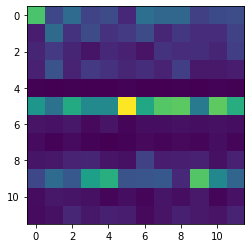

24000/24000 [==============================] - 2s 87us/sample


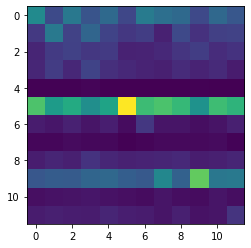

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 10s 406us/sample - loss: 2.4481 - acc: 0.1367 - val_loss: 2.4649 - val_acc: 0.1431
Epoch 22/22
24000/24000 [==============================] - 7s 311us/sample - loss: 2.4315 - acc: 0.1450 - val_loss: 2.4629 - val_acc: 0.1450
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 10s 414us/sample - loss: 2.4494 - acc: 0.1395 - val_loss: 2.4636 - val_acc: 0.1231
Epoch 24/24
24000/24000 [==============================] - 8s 318us/sample - loss: 2.4320 - acc: 0.1455 - val_loss: 2.4625 - val_acc: 0.1235
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 10s 415us/sample - loss: 2.4378 - acc: 0.1457 - val_loss: 2.4532 - val_acc: 0.1348
Epoch 26/26
24000/24000 [==============================] - 8s 313us/sample - loss: 2.4218 - acc: 0.1538 - val_loss: 2.4511 - val_acc: 0.1356
Trai

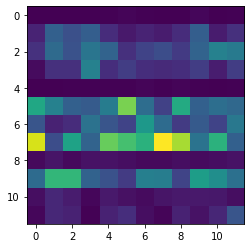

24000/24000 [==============================] - 2s 88us/sample


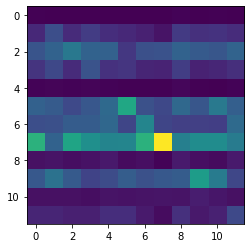

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 10s 419us/sample - loss: 2.4488 - acc: 0.1380 - val_loss: 2.4401 - val_acc: 0.1410
Epoch 32/32
24000/24000 [==============================] - 8s 320us/sample - loss: 2.4312 - acc: 0.1466 - val_loss: 2.4405 - val_acc: 0.1435
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 10s 417us/sample - loss: 2.4329 - acc: 0.1496 - val_loss: 2.4401 - val_acc: 0.1415
Epoch 34/34
24000/24000 [==============================] - 8s 331us/sample - loss: 2.4175 - acc: 0.1578 - val_loss: 2.4373 - val_acc: 0.1460
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 10s 420us/sample - loss: 2.4379 - acc: 0.1441 - val_loss: 2.4386 - val_acc: 0.1402
Epoch 36/36
24000/24000 [==============================] - 8s 327us/sample - loss: 2.4238 - acc: 0.1507 - val_loss: 2.4397 - val_acc: 0.1346
Trai

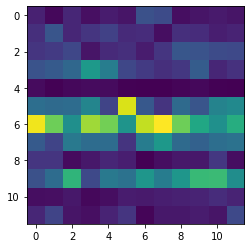

24000/24000 [==============================] - 2s 89us/sample


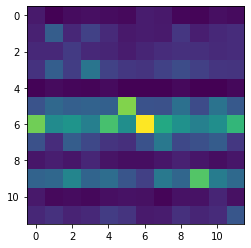

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 11s 439us/sample - loss: 2.4221 - acc: 0.1525 - val_loss: 2.4367 - val_acc: 0.1481
Epoch 42/42
24000/24000 [==============================] - 8s 335us/sample - loss: 2.4077 - acc: 0.1561 - val_loss: 2.4386 - val_acc: 0.1496
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 10s 433us/sample - loss: 2.4192 - acc: 0.1550 - val_loss: 2.4207 - val_acc: 0.1473
Epoch 44/44
24000/24000 [==============================] - 8s 339us/sample - loss: 2.4043 - acc: 0.1623 - val_loss: 2.4210 - val_acc: 0.1481
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 10s 436us/sample - loss: 2.4279 - acc: 0.1490 - val_loss: 2.4238 - val_acc: 0.1598
Epoch 46/46
24000/24000 [==============================] - 8s 340us/sample - loss: 2.4133 - acc: 0.1567 - val_loss: 2.4236 - val_acc: 0.1562
Trai

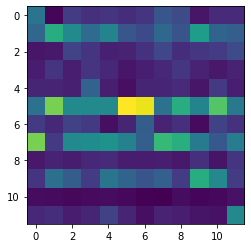

24000/24000 [==============================] - 2s 91us/sample


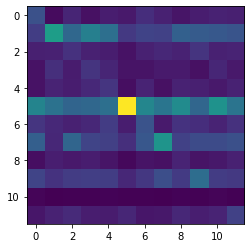

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 10s 435us/sample - loss: 2.4145 - acc: 0.1612 - val_loss: 2.4061 - val_acc: 0.1587
Epoch 52/52
24000/24000 [==============================] - 8s 346us/sample - loss: 2.3954 - acc: 0.1712 - val_loss: 2.4141 - val_acc: 0.1581
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 11s 442us/sample - loss: 2.4110 - acc: 0.1609 - val_loss: 2.4251 - val_acc: 0.1454
Epoch 54/54
24000/24000 [==============================] - 8s 346us/sample - loss: 2.3932 - acc: 0.1667 - val_loss: 2.4287 - val_acc: 0.1433
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 11s 439us/sample - loss: 2.4000 - acc: 0.1674 - val_loss: 2.4218 - val_acc: 0.1669
Epoch 56/56
24000/24000 [==============================] - 9s 355us/sample - loss: 2.3832 - acc: 0.1738 - val_loss: 2.4178 - val_acc: 0.1663
Trai

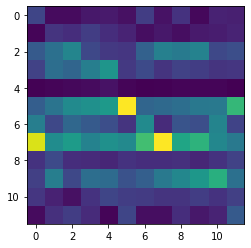

24000/24000 [==============================] - 2s 93us/sample


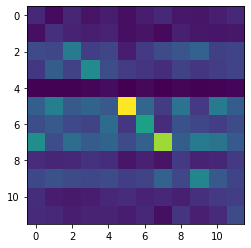

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 11s 451us/sample - loss: 2.4006 - acc: 0.1655 - val_loss: 2.3880 - val_acc: 0.1685
Epoch 62/62
24000/24000 [==============================] - 9s 356us/sample - loss: 2.3832 - acc: 0.1712 - val_loss: 2.3888 - val_acc: 0.1702
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 11s 456us/sample - loss: 2.3990 - acc: 0.1695 - val_loss: 2.3853 - val_acc: 0.1717
Epoch 64/64
24000/24000 [==============================] - 9s 362us/sample - loss: 2.3844 - acc: 0.1770 - val_loss: 2.3946 - val_acc: 0.1654
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 11s 452us/sample - loss: 2.4007 - acc: 0.1627 - val_loss: 2.4444 - val_acc: 0.1433
Epoch 66/66
24000/24000 [==============================] - 8s 354us/sample - loss: 2.3841 - acc: 0.1700 - val_loss: 2.4409 - val_acc: 0.1477
Trai

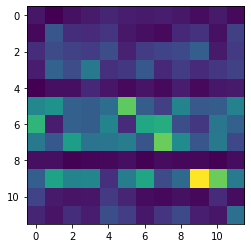

24000/24000 [==============================] - 2s 94us/sample


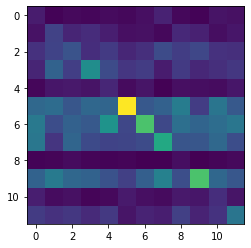

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 11s 455us/sample - loss: 2.4002 - acc: 0.1622 - val_loss: 2.4562 - val_acc: 0.1456
Epoch 72/72
24000/24000 [==============================] - 9s 363us/sample - loss: 2.3826 - acc: 0.1706 - val_loss: 2.4613 - val_acc: 0.1421
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 11s 463us/sample - loss: 2.3928 - acc: 0.1682 - val_loss: 2.4199 - val_acc: 0.1600
Epoch 74/74
24000/24000 [==============================] - 9s 356us/sample - loss: 2.3735 - acc: 0.1793 - val_loss: 2.4190 - val_acc: 0.1552
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 11s 457us/sample - loss: 2.3791 - acc: 0.1753 - val_loss: 2.4363 - val_acc: 0.1471
Epoch 76/76
24000/24000 [==============================] - 9s 359us/sample - loss: 2.3591 - acc: 0.1860 - val_loss: 2.4476 - val_acc: 0.1490
Trai

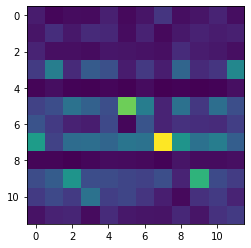

24000/24000 [==============================] - 2s 95us/sample


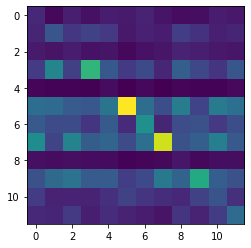

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 11s 454us/sample - loss: 2.3837 - acc: 0.1742 - val_loss: 2.4163 - val_acc: 0.1723
Epoch 82/82
24000/24000 [==============================] - 9s 364us/sample - loss: 2.3665 - acc: 0.1848 - val_loss: 2.4240 - val_acc: 0.1744
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 11s 455us/sample - loss: 2.3864 - acc: 0.1723 - val_loss: 2.4241 - val_acc: 0.1546
Epoch 84/84
24000/24000 [==============================] - 9s 368us/sample - loss: 2.3693 - acc: 0.1800 - val_loss: 2.4284 - val_acc: 0.1494
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 11s 460us/sample - loss: 2.3877 - acc: 0.1716 - val_loss: 2.3757 - val_acc: 0.1790
Epoch 86/86
24000/24000 [==============================] - 9s 367us/sample - loss: 2.3705 - acc: 0.1776 - val_loss: 2.3871 - val_acc: 0.1683
Trai

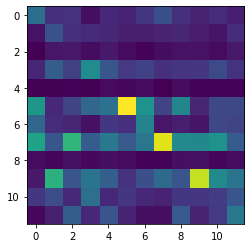

24000/24000 [==============================] - 2s 96us/sample


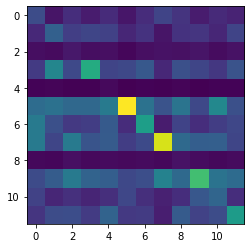

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 11s 461us/sample - loss: 2.3899 - acc: 0.1674 - val_loss: 2.4126 - val_acc: 0.1744
Epoch 92/92
24000/24000 [==============================] - 9s 363us/sample - loss: 2.3715 - acc: 0.1763 - val_loss: 2.4230 - val_acc: 0.1615
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 11s 462us/sample - loss: 2.3636 - acc: 0.1798 - val_loss: 2.4451 - val_acc: 0.1538
Epoch 94/94
24000/24000 [==============================] - 9s 367us/sample - loss: 2.3446 - acc: 0.1899 - val_loss: 2.4448 - val_acc: 0.1513
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 11s 461us/sample - loss: 2.3738 - acc: 0.1768 - val_loss: 2.4399 - val_acc: 0.1544
Epoch 96/96
24000/24000 [==============================] - 9s 369us/sample - loss: 2.3517 - acc: 0.1871 - val_loss: 2.4508 - val_acc: 0.1562
Trai

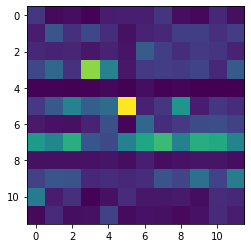

24000/24000 [==============================] - 2s 97us/sample


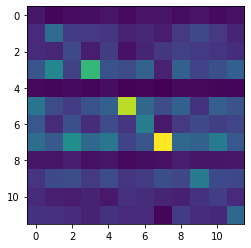

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 100, 25)           100       
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 32)           128       
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
batch_normalization_10 (Batc (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32)               

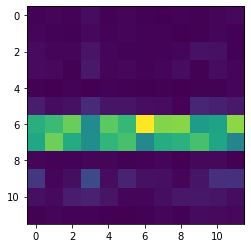

24000/24000 [==============================] - 3s 123us/sample


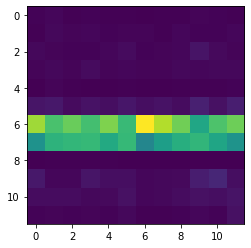

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 15s 613us/sample - loss: 2.4964 - acc: 0.1163 - val_loss: 2.4841 - val_acc: 0.0925
Epoch 12/12
24000/24000 [==============================] - 12s 516us/sample - loss: 2.4677 - acc: 0.1235 - val_loss: 2.4828 - val_acc: 0.0942
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 15s 619us/sample - loss: 2.4727 - acc: 0.1254 - val_loss: 2.4823 - val_acc: 0.0958
Epoch 14/14
24000/24000 [==============================] - 13s 521us/sample - loss: 2.4486 - acc: 0.1369 - val_loss: 2.4811 - val_acc: 0.0952
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 15s 620us/sample - loss: 2.4628 - acc: 0.1294 - val_loss: 2.4712 - val_acc: 0.1092
Epoch 16/16
24000/24000 [==============================] - 13s 523us/sample - loss: 2.4391 - acc: 0.1399 - val_loss: 2.4685 - val_acc: 0.1092
T

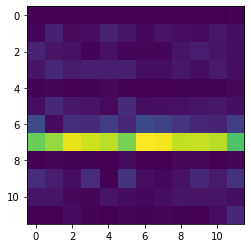

24000/24000 [==============================] - 3s 123us/sample


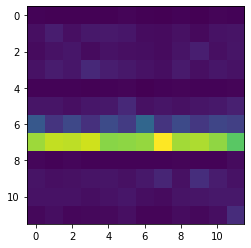

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 15s 620us/sample - loss: 2.4513 - acc: 0.1354 - val_loss: 2.4741 - val_acc: 0.0948
Epoch 22/22
24000/24000 [==============================] - 13s 532us/sample - loss: 2.4306 - acc: 0.1449 - val_loss: 2.4719 - val_acc: 0.0940
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 15s 628us/sample - loss: 2.4246 - acc: 0.1531 - val_loss: 2.4615 - val_acc: 0.1008
Epoch 24/24
24000/24000 [==============================] - 13s 533us/sample - loss: 2.4032 - acc: 0.1645 - val_loss: 2.4595 - val_acc: 0.1090
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 15s 628us/sample - loss: 2.4336 - acc: 0.1476 - val_loss: 2.4719 - val_acc: 0.1050
Epoch 26/26
24000/24000 [==============================] - 13s 534us/sample - loss: 2.4148 - acc: 0.1546 - val_loss: 2.4742 - val_acc: 0.1054
T

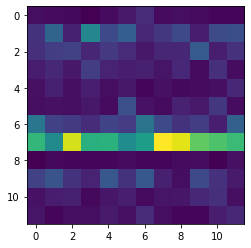

24000/24000 [==============================] - 3s 126us/sample


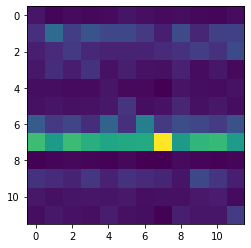

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 15s 631us/sample - loss: 2.4092 - acc: 0.1636 - val_loss: 2.4346 - val_acc: 0.1575
Epoch 32/32
24000/24000 [==============================] - 13s 538us/sample - loss: 2.3879 - acc: 0.1783 - val_loss: 2.4295 - val_acc: 0.1554
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 15s 636us/sample - loss: 2.4303 - acc: 0.1554 - val_loss: 2.4626 - val_acc: 0.1196
Epoch 34/34
24000/24000 [==============================] - 13s 543us/sample - loss: 2.4067 - acc: 0.1625 - val_loss: 2.4637 - val_acc: 0.1160
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 15s 641us/sample - loss: 2.4110 - acc: 0.1595 - val_loss: 2.4688 - val_acc: 0.1225
Epoch 36/36
24000/24000 [==============================] - 13s 541us/sample - loss: 2.3905 - acc: 0.1684 - val_loss: 2.4639 - val_acc: 0.1229
T

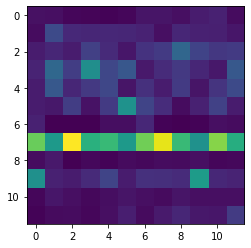

24000/24000 [==============================] - 3s 124us/sample


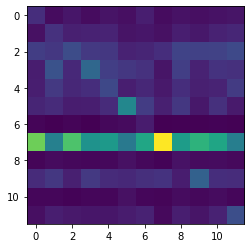

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 15s 639us/sample - loss: 2.4051 - acc: 0.1658 - val_loss: 2.4354 - val_acc: 0.1342
Epoch 42/42
24000/24000 [==============================] - 13s 535us/sample - loss: 2.3850 - acc: 0.1738 - val_loss: 2.4419 - val_acc: 0.1265
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 15s 637us/sample - loss: 2.3935 - acc: 0.1681 - val_loss: 2.4453 - val_acc: 0.1329
Epoch 44/44
24000/24000 [==============================] - 13s 539us/sample - loss: 2.3742 - acc: 0.1773 - val_loss: 2.4349 - val_acc: 0.1423
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 15s 634us/sample - loss: 2.3949 - acc: 0.1667 - val_loss: 2.4025 - val_acc: 0.1598
Epoch 46/46
24000/24000 [==============================] - 13s 535us/sample - loss: 2.3735 - acc: 0.1754 - val_loss: 2.4055 - val_acc: 0.1535
T

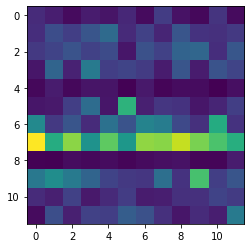

24000/24000 [==============================] - 3s 127us/sample


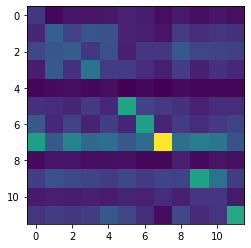

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 15s 636us/sample - loss: 2.3940 - acc: 0.1668 - val_loss: 2.4284 - val_acc: 0.1377
Epoch 52/52
24000/24000 [==============================] - 13s 545us/sample - loss: 2.3712 - acc: 0.1743 - val_loss: 2.4261 - val_acc: 0.1417
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 15s 637us/sample - loss: 2.3811 - acc: 0.1769 - val_loss: 2.4212 - val_acc: 0.1390
Epoch 54/54
24000/24000 [==============================] - 13s 538us/sample - loss: 2.3603 - acc: 0.1862 - val_loss: 2.4231 - val_acc: 0.1381
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 15s 629us/sample - loss: 2.3725 - acc: 0.1857 - val_loss: 2.3980 - val_acc: 0.1587
Epoch 56/56
24000/24000 [==============================] - 13s 540us/sample - loss: 2.3489 - acc: 0.1987 - val_loss: 2.3979 - val_acc: 0.1671
T

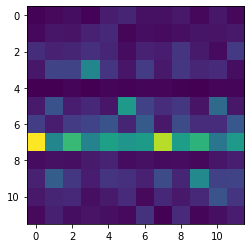

24000/24000 [==============================] - 3s 122us/sample


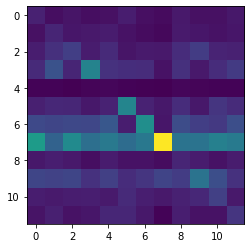

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 15s 639us/sample - loss: 2.3853 - acc: 0.1710 - val_loss: 2.3984 - val_acc: 0.1600
Epoch 62/62
24000/24000 [==============================] - 13s 538us/sample - loss: 2.3625 - acc: 0.1790 - val_loss: 2.3871 - val_acc: 0.1629
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 15s 634us/sample - loss: 2.3633 - acc: 0.1840 - val_loss: 2.4523 - val_acc: 0.1581
Epoch 64/64
24000/24000 [==============================] - 13s 539us/sample - loss: 2.3387 - acc: 0.1950 - val_loss: 2.4516 - val_acc: 0.1602
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 15s 634us/sample - loss: 2.3585 - acc: 0.1875 - val_loss: 2.4608 - val_acc: 0.1460
Epoch 66/66
24000/24000 [==============================] - 13s 536us/sample - loss: 2.3348 - acc: 0.1982 - val_loss: 2.4487 - val_acc: 0.1402
T

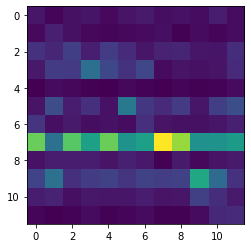

24000/24000 [==============================] - 3s 124us/sample


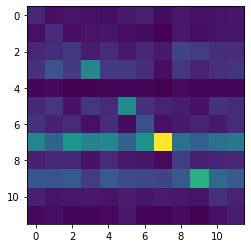

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 15s 631us/sample - loss: 2.3570 - acc: 0.1813 - val_loss: 2.4991 - val_acc: 0.1215
Epoch 72/72
24000/24000 [==============================] - 13s 553us/sample - loss: 2.3331 - acc: 0.1930 - val_loss: 2.4961 - val_acc: 0.1200
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 15s 635us/sample - loss: 2.3595 - acc: 0.1842 - val_loss: 2.4542 - val_acc: 0.1540
Epoch 74/74
24000/24000 [==============================] - 13s 538us/sample - loss: 2.3347 - acc: 0.1946 - val_loss: 2.4565 - val_acc: 0.1565
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 15s 633us/sample - loss: 2.3593 - acc: 0.1838 - val_loss: 2.4675 - val_acc: 0.1475
Epoch 76/76
24000/24000 [==============================] - 13s 542us/sample - loss: 2.3334 - acc: 0.1947 - val_loss: 2.4863 - val_acc: 0.1417
T

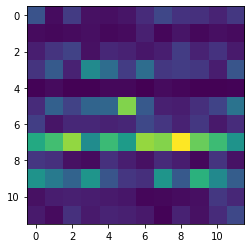

24000/24000 [==============================] - 3s 123us/sample


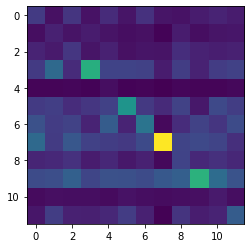

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 15s 617us/sample - loss: 2.3512 - acc: 0.1881 - val_loss: 2.4299 - val_acc: 0.1408
Epoch 82/82
24000/24000 [==============================] - 13s 525us/sample - loss: 2.3232 - acc: 0.2004 - val_loss: 2.4513 - val_acc: 0.1262
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 15s 639us/sample - loss: 2.3379 - acc: 0.1951 - val_loss: 2.4355 - val_acc: 0.1715
Epoch 84/84
24000/24000 [==============================] - 13s 537us/sample - loss: 2.3134 - acc: 0.2045 - val_loss: 2.4393 - val_acc: 0.1760
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 15s 623us/sample - loss: 2.3166 - acc: 0.2085 - val_loss: 2.4433 - val_acc: 0.1492
Epoch 86/86
24000/24000 [==============================] - 13s 526us/sample - loss: 2.2927 - acc: 0.2180 - val_loss: 2.4671 - val_acc: 0.1437
T

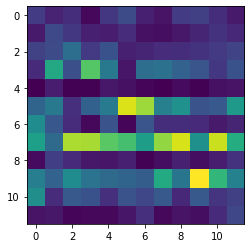

24000/24000 [==============================] - 3s 123us/sample


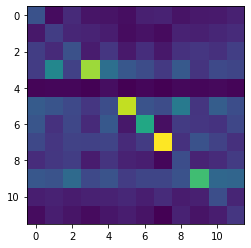

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 15s 622us/sample - loss: 2.3015 - acc: 0.2096 - val_loss: 2.4594 - val_acc: 0.1610
Epoch 92/92
24000/24000 [==============================] - 13s 527us/sample - loss: 2.2768 - acc: 0.2184 - val_loss: 2.4652 - val_acc: 0.1640
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 15s 633us/sample - loss: 2.3121 - acc: 0.2093 - val_loss: 2.4201 - val_acc: 0.1923
Epoch 94/94
24000/24000 [==============================] - 13s 531us/sample - loss: 2.2845 - acc: 0.2194 - val_loss: 2.4204 - val_acc: 0.1858
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 15s 621us/sample - loss: 2.3064 - acc: 0.2035 - val_loss: 2.4953 - val_acc: 0.1629
Epoch 96/96
24000/24000 [==============================] - 13s 523us/sample - loss: 2.2779 - acc: 0.2177 - val_loss: 2.5039 - val_acc: 0.1546
T

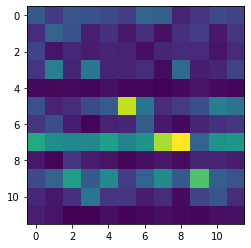

24000/24000 [==============================] - 3s 133us/sample


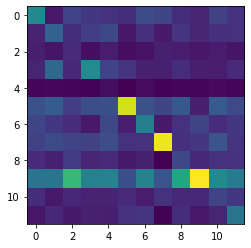

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_7 (LSTM)                (None, 16)                5184      
_________________________________________________________________
batch_normalization_14 (Batc (None, 16)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32)               

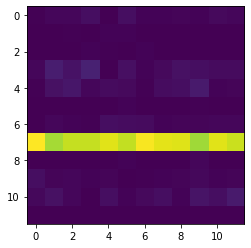

24000/24000 [==============================] - 5s 199us/sample


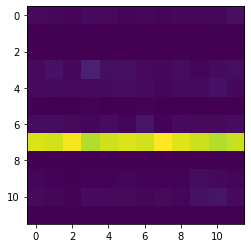

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 20s 851us/sample - loss: 2.4854 - acc: 0.1241 - val_loss: 2.4782 - val_acc: 0.0958
Epoch 12/12
24000/24000 [==============================] - 18s 759us/sample - loss: 2.4528 - acc: 0.1370 - val_loss: 2.4772 - val_acc: 0.0994
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 20s 853us/sample - loss: 2.4702 - acc: 0.1291 - val_loss: 2.4751 - val_acc: 0.0988
Epoch 14/14
24000/24000 [==============================] - 18s 768us/sample - loss: 2.4366 - acc: 0.1411 - val_loss: 2.4724 - val_acc: 0.1010
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 21s 854us/sample - loss: 2.4504 - acc: 0.1378 - val_loss: 2.4845 - val_acc: 0.0933
Epoch 16/16
24000/24000 [==============================] - 18s 766us/sample - loss: 2.4210 - acc: 0.1545 - val_loss: 2.4841 - val_acc: 0.0965
T

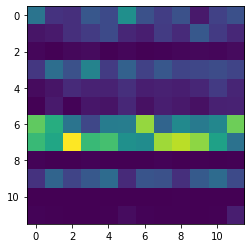

24000/24000 [==============================] - 5s 216us/sample


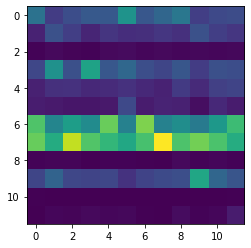

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 22s 915us/sample - loss: 2.4251 - acc: 0.1567 - val_loss: 2.4647 - val_acc: 0.1158
Epoch 22/22
24000/24000 [==============================] - 20s 814us/sample - loss: 2.3941 - acc: 0.1712 - val_loss: 2.4635 - val_acc: 0.1219
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 22s 921us/sample - loss: 2.4135 - acc: 0.1614 - val_loss: 2.4495 - val_acc: 0.1310
Epoch 24/24
24000/24000 [==============================] - 20s 817us/sample - loss: 2.3836 - acc: 0.1756 - val_loss: 2.4487 - val_acc: 0.1350
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 22s 914us/sample - loss: 2.4119 - acc: 0.1603 - val_loss: 2.4461 - val_acc: 0.1344
Epoch 26/26
24000/24000 [==============================] - 21s 893us/sample - loss: 2.3833 - acc: 0.1737 - val_loss: 2.4454 - val_acc: 0.1421
T

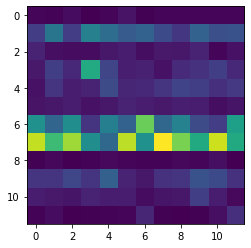

24000/24000 [==============================] - 5s 200us/sample


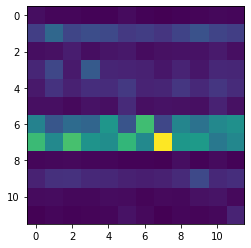

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 21s 882us/sample - loss: 2.3851 - acc: 0.1721 - val_loss: 2.4273 - val_acc: 0.1569
Epoch 32/32
24000/24000 [==============================] - 19s 788us/sample - loss: 2.3499 - acc: 0.1863 - val_loss: 2.4169 - val_acc: 0.1554
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 23s 954us/sample - loss: 2.3992 - acc: 0.1709 - val_loss: 2.4467 - val_acc: 0.1419
Epoch 34/34
24000/24000 [==============================] - 20s 846us/sample - loss: 2.3660 - acc: 0.1840 - val_loss: 2.4642 - val_acc: 0.1283
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 23s 951us/sample - loss: 2.3912 - acc: 0.1768 - val_loss: 2.4291 - val_acc: 0.1488
Epoch 36/36
24000/24000 [==============================] - 20s 841us/sample - loss: 2.3613 - acc: 0.1885 - val_loss: 2.4277 - val_acc: 0.1485
T

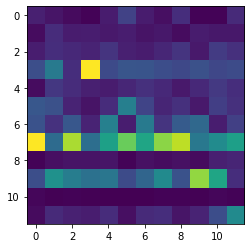

24000/24000 [==============================] - 5s 201us/sample


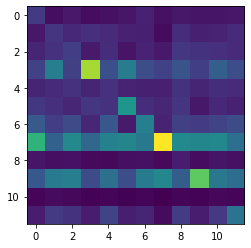

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 21s 869us/sample - loss: 2.3715 - acc: 0.1766 - val_loss: 2.4189 - val_acc: 0.1575
Epoch 42/42
24000/24000 [==============================] - 19s 777us/sample - loss: 2.3415 - acc: 0.1926 - val_loss: 2.4157 - val_acc: 0.1546
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 21s 869us/sample - loss: 2.3727 - acc: 0.1811 - val_loss: 2.4365 - val_acc: 0.1460
Epoch 44/44
24000/24000 [==============================] - 18s 769us/sample - loss: 2.3392 - acc: 0.1980 - val_loss: 2.4446 - val_acc: 0.1394
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 22s 909us/sample - loss: 2.3629 - acc: 0.1809 - val_loss: 2.4052 - val_acc: 0.1437
Epoch 46/46
24000/24000 [==============================] - 20s 821us/sample - loss: 2.3269 - acc: 0.1969 - val_loss: 2.4119 - val_acc: 0.1460
T

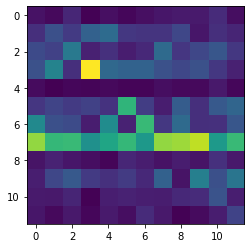

24000/24000 [==============================] - 5s 220us/sample


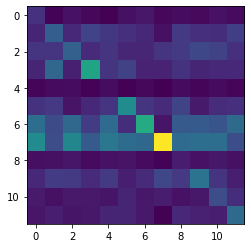

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 22s 925us/sample - loss: 2.3499 - acc: 0.1934 - val_loss: 2.4098 - val_acc: 0.1575
Epoch 52/52
24000/24000 [==============================] - 20s 829us/sample - loss: 2.3133 - acc: 0.2061 - val_loss: 2.4085 - val_acc: 0.1602
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 22s 924us/sample - loss: 2.3626 - acc: 0.1795 - val_loss: 2.3953 - val_acc: 0.1579
Epoch 54/54
24000/24000 [==============================] - 20s 822us/sample - loss: 2.3312 - acc: 0.1913 - val_loss: 2.4458 - val_acc: 0.1290
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 22s 931us/sample - loss: 2.3342 - acc: 0.1987 - val_loss: 2.4140 - val_acc: 0.1702
Epoch 56/56
24000/24000 [==============================] - 20s 817us/sample - loss: 2.3034 - acc: 0.2134 - val_loss: 2.4368 - val_acc: 0.1558
T

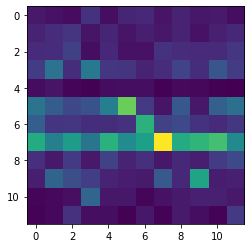

24000/24000 [==============================] - 5s 218us/sample


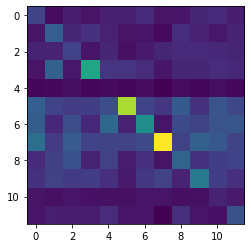

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 22s 935us/sample - loss: 2.3031 - acc: 0.2090 - val_loss: 2.4768 - val_acc: 0.1467
Epoch 62/62
24000/24000 [==============================] - 20s 853us/sample - loss: 2.2677 - acc: 0.2273 - val_loss: 2.4475 - val_acc: 0.1533
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 22s 919us/sample - loss: 2.3491 - acc: 0.1871 - val_loss: 2.4350 - val_acc: 0.1569
Epoch 64/64
24000/24000 [==============================] - 20s 816us/sample - loss: 2.3106 - acc: 0.2023 - val_loss: 2.4637 - val_acc: 0.1479
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 21s 869us/sample - loss: 2.3035 - acc: 0.2113 - val_loss: 2.5168 - val_acc: 0.1502
Epoch 66/66
24000/24000 [==============================] - 18s 771us/sample - loss: 2.2663 - acc: 0.2294 - val_loss: 2.4998 - val_acc: 0.1496
T

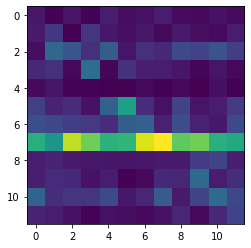

24000/24000 [==============================] - 5s 200us/sample


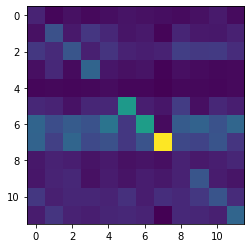

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 21s 865us/sample - loss: 2.2856 - acc: 0.2160 - val_loss: 2.4442 - val_acc: 0.1569
Epoch 72/72
24000/24000 [==============================] - 19s 772us/sample - loss: 2.2508 - acc: 0.2280 - val_loss: 2.4584 - val_acc: 0.1612
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 21s 863us/sample - loss: 2.3046 - acc: 0.2090 - val_loss: 2.4764 - val_acc: 0.1492
Epoch 74/74
24000/24000 [==============================] - 19s 775us/sample - loss: 2.2665 - acc: 0.2243 - val_loss: 2.4303 - val_acc: 0.1569
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 21s 867us/sample - loss: 2.3242 - acc: 0.2031 - val_loss: 2.4199 - val_acc: 0.1560
Epoch 76/76
24000/24000 [==============================] - 18s 769us/sample - loss: 2.2876 - acc: 0.2181 - val_loss: 2.4174 - val_acc: 0.1575
T

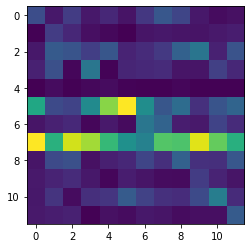

24000/24000 [==============================] - 5s 198us/sample


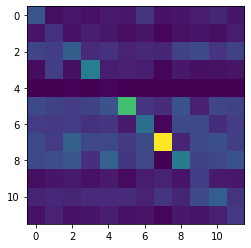

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 21s 861us/sample - loss: 2.2895 - acc: 0.2177 - val_loss: 2.4868 - val_acc: 0.1490
Epoch 82/82
24000/24000 [==============================] - 18s 770us/sample - loss: 2.2528 - acc: 0.2314 - val_loss: 2.5284 - val_acc: 0.1400
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 21s 857us/sample - loss: 2.2915 - acc: 0.2125 - val_loss: 2.4428 - val_acc: 0.1723
Epoch 84/84
24000/24000 [==============================] - 18s 764us/sample - loss: 2.2516 - acc: 0.2306 - val_loss: 2.4324 - val_acc: 0.1858
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 21s 854us/sample - loss: 2.2837 - acc: 0.2156 - val_loss: 2.4097 - val_acc: 0.1665
Epoch 86/86
24000/24000 [==============================] - 18s 768us/sample - loss: 2.2433 - acc: 0.2332 - val_loss: 2.4017 - val_acc: 0.1694
T

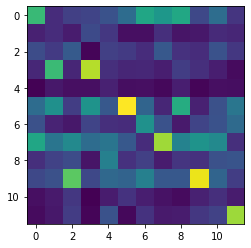

24000/24000 [==============================] - 5s 199us/sample


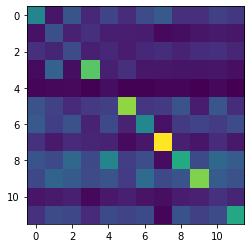

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 21s 858us/sample - loss: 2.2551 - acc: 0.2345 - val_loss: 2.4142 - val_acc: 0.1610
Epoch 92/92
24000/24000 [==============================] - 18s 768us/sample - loss: 2.2176 - acc: 0.2497 - val_loss: 2.4218 - val_acc: 0.1621
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 21s 866us/sample - loss: 2.2597 - acc: 0.2255 - val_loss: 2.4441 - val_acc: 0.1685
Epoch 94/94
24000/24000 [==============================] - 18s 767us/sample - loss: 2.2264 - acc: 0.2352 - val_loss: 2.4374 - val_acc: 0.1844
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 21s 862us/sample - loss: 2.2827 - acc: 0.2184 - val_loss: 2.4807 - val_acc: 0.1417
Epoch 96/96
24000/24000 [==============================] - 18s 766us/sample - loss: 2.2457 - acc: 0.2355 - val_loss: 2.5007 - val_acc: 0.1467
T

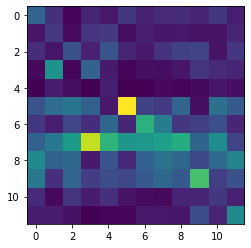

24000/24000 [==============================] - 5s 205us/sample


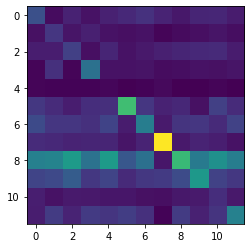

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_17 (Batc (None, 100, 8)            32        
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                5248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32)                128       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_19 (Batc (None, 32)               

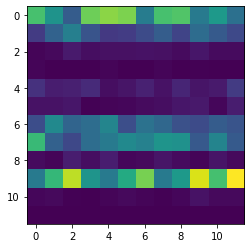

24000/24000 [==============================] - 3s 107us/sample


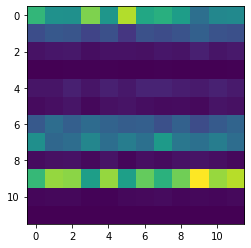

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 14s 580us/sample - loss: 2.4880 - acc: 0.1143 - val_loss: 2.4824 - val_acc: 0.1002
Epoch 12/12
24000/24000 [==============================] - 12s 484us/sample - loss: 2.4693 - acc: 0.1212 - val_loss: 2.4826 - val_acc: 0.1052
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 14s 590us/sample - loss: 2.4893 - acc: 0.1125 - val_loss: 2.4849 - val_acc: 0.1021
Epoch 14/14
24000/24000 [==============================] - 12s 482us/sample - loss: 2.4717 - acc: 0.1203 - val_loss: 2.4855 - val_acc: 0.0979
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 14s 593us/sample - loss: 2.4696 - acc: 0.1205 - val_loss: 2.4778 - val_acc: 0.0973
Epoch 16/16
24000/24000 [==============================] - 12s 485us/sample - loss: 2.4531 - acc: 0.1306 - val_loss: 2.4765 - val_acc: 0.1010
T

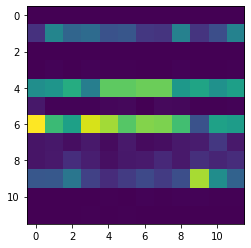

24000/24000 [==============================] - 3s 115us/sample


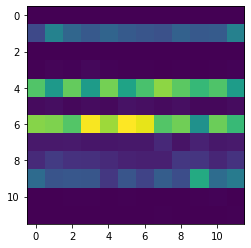

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 15s 609us/sample - loss: 2.4627 - acc: 0.1290 - val_loss: 2.4787 - val_acc: 0.0967
Epoch 22/22
24000/24000 [==============================] - 12s 491us/sample - loss: 2.4487 - acc: 0.1372 - val_loss: 2.4767 - val_acc: 0.1017
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 14s 602us/sample - loss: 2.4500 - acc: 0.1352 - val_loss: 2.4699 - val_acc: 0.1175
Epoch 24/24
24000/24000 [==============================] - 12s 488us/sample - loss: 2.4371 - acc: 0.1428 - val_loss: 2.4683 - val_acc: 0.1154
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 14s 592us/sample - loss: 2.4402 - acc: 0.1394 - val_loss: 2.4682 - val_acc: 0.1187
Epoch 26/26
24000/24000 [==============================] - 12s 486us/sample - loss: 2.4256 - acc: 0.1473 - val_loss: 2.4674 - val_acc: 0.1156
T

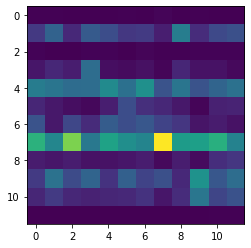

24000/24000 [==============================] - 3s 117us/sample


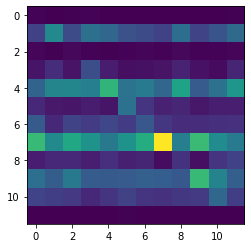

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 14s 603us/sample - loss: 2.4427 - acc: 0.1420 - val_loss: 2.4544 - val_acc: 0.1206
Epoch 32/32
24000/24000 [==============================] - 12s 492us/sample - loss: 2.4260 - acc: 0.1532 - val_loss: 2.4506 - val_acc: 0.1202
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 14s 599us/sample - loss: 2.4422 - acc: 0.1372 - val_loss: 2.4739 - val_acc: 0.1250
Epoch 34/34
24000/24000 [==============================] - 12s 484us/sample - loss: 2.4281 - acc: 0.1451 - val_loss: 2.4758 - val_acc: 0.1233
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 14s 600us/sample - loss: 2.4314 - acc: 0.1447 - val_loss: 2.4614 - val_acc: 0.1192
Epoch 36/36
24000/24000 [==============================] - 12s 485us/sample - loss: 2.4158 - acc: 0.1564 - val_loss: 2.4606 - val_acc: 0.1154
T

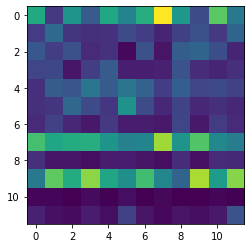

24000/24000 [==============================] - 3s 118us/sample


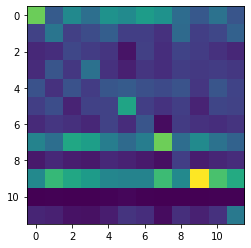

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 14s 588us/sample - loss: 2.4271 - acc: 0.1458 - val_loss: 2.4509 - val_acc: 0.1256
Epoch 42/42
24000/24000 [==============================] - 11s 471us/sample - loss: 2.4093 - acc: 0.1588 - val_loss: 2.4641 - val_acc: 0.1187
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 14s 599us/sample - loss: 2.4159 - acc: 0.1563 - val_loss: 2.4373 - val_acc: 0.1483
Epoch 44/44
24000/24000 [==============================] - 12s 489us/sample - loss: 2.4000 - acc: 0.1615 - val_loss: 2.4298 - val_acc: 0.1538
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 14s 599us/sample - loss: 2.4214 - acc: 0.1512 - val_loss: 2.4688 - val_acc: 0.1235
Epoch 46/46
24000/24000 [==============================] - 12s 492us/sample - loss: 2.4030 - acc: 0.1591 - val_loss: 2.4679 - val_acc: 0.1329
T

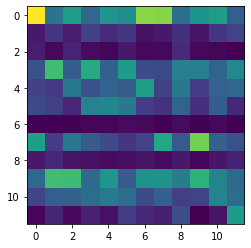

24000/24000 [==============================] - 3s 118us/sample


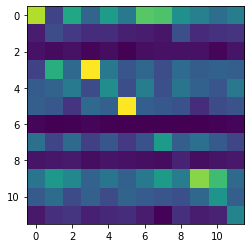

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 14s 601us/sample - loss: 2.4039 - acc: 0.1672 - val_loss: 2.4223 - val_acc: 0.1440
Epoch 52/52
24000/24000 [==============================] - 12s 484us/sample - loss: 2.3851 - acc: 0.1748 - val_loss: 2.4236 - val_acc: 0.1460
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 14s 603us/sample - loss: 2.4148 - acc: 0.1596 - val_loss: 2.4514 - val_acc: 0.1450
Epoch 54/54
24000/24000 [==============================] - 12s 489us/sample - loss: 2.3967 - acc: 0.1654 - val_loss: 2.4448 - val_acc: 0.1448
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 14s 588us/sample - loss: 2.3931 - acc: 0.1681 - val_loss: 2.4290 - val_acc: 0.1610
Epoch 56/56
24000/24000 [==============================] - 11s 477us/sample - loss: 2.3808 - acc: 0.1736 - val_loss: 2.4272 - val_acc: 0.1665
T

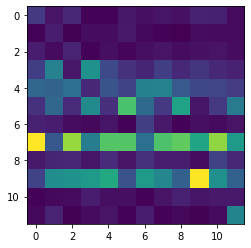

24000/24000 [==============================] - 3s 117us/sample


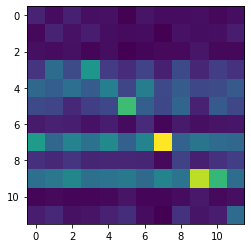

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 14s 594us/sample - loss: 2.3968 - acc: 0.1677 - val_loss: 2.4252 - val_acc: 0.1448
Epoch 62/62
24000/24000 [==============================] - 12s 492us/sample - loss: 2.3795 - acc: 0.1747 - val_loss: 2.4260 - val_acc: 0.1394
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 14s 587us/sample - loss: 2.3865 - acc: 0.1737 - val_loss: 2.4343 - val_acc: 0.1579
Epoch 64/64
24000/24000 [==============================] - 11s 476us/sample - loss: 2.3683 - acc: 0.1805 - val_loss: 2.4291 - val_acc: 0.1635
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 14s 599us/sample - loss: 2.3920 - acc: 0.1715 - val_loss: 2.4287 - val_acc: 0.1681
Epoch 66/66
24000/24000 [==============================] - 12s 490us/sample - loss: 2.3757 - acc: 0.1759 - val_loss: 2.4442 - val_acc: 0.1531
T

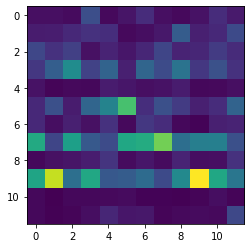

24000/24000 [==============================] - 3s 117us/sample


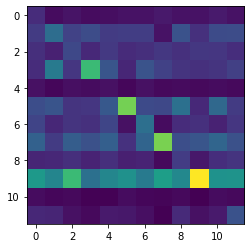

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 14s 599us/sample - loss: 2.3838 - acc: 0.1782 - val_loss: 2.4257 - val_acc: 0.1527
Epoch 72/72
24000/24000 [==============================] - 12s 492us/sample - loss: 2.3625 - acc: 0.1851 - val_loss: 2.4309 - val_acc: 0.1460
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 14s 596us/sample - loss: 2.3869 - acc: 0.1740 - val_loss: 2.4863 - val_acc: 0.1354
Epoch 74/74
24000/24000 [==============================] - 12s 488us/sample - loss: 2.3673 - acc: 0.1805 - val_loss: 2.4666 - val_acc: 0.1504
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 14s 596us/sample - loss: 2.3779 - acc: 0.1803 - val_loss: 2.4284 - val_acc: 0.1642
Epoch 76/76
24000/24000 [==============================] - 12s 486us/sample - loss: 2.3590 - acc: 0.1895 - val_loss: 2.4418 - val_acc: 0.1600
T

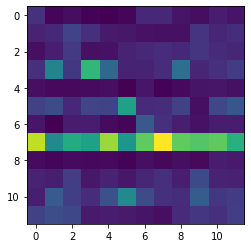

24000/24000 [==============================] - 3s 119us/sample


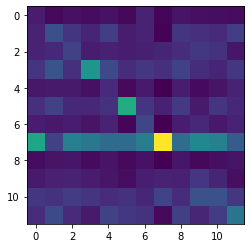

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 15s 608us/sample - loss: 2.3907 - acc: 0.1716 - val_loss: 2.4455 - val_acc: 0.1429
Epoch 82/82
24000/24000 [==============================] - 12s 495us/sample - loss: 2.3711 - acc: 0.1755 - val_loss: 2.4499 - val_acc: 0.1444
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 15s 623us/sample - loss: 2.3693 - acc: 0.1801 - val_loss: 2.4261 - val_acc: 0.1640
Epoch 84/84
24000/24000 [==============================] - 12s 519us/sample - loss: 2.3509 - acc: 0.1890 - val_loss: 2.4338 - val_acc: 0.1604
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 15s 609us/sample - loss: 2.3746 - acc: 0.1798 - val_loss: 2.4670 - val_acc: 0.1425
Epoch 86/86
24000/24000 [==============================] - 12s 497us/sample - loss: 2.3564 - acc: 0.1856 - val_loss: 2.4668 - val_acc: 0.1462
T

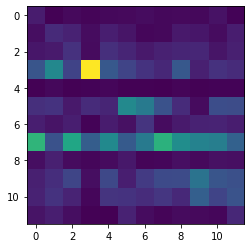

24000/24000 [==============================] - 3s 108us/sample


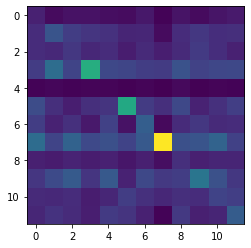

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 14s 564us/sample - loss: 2.3674 - acc: 0.1810 - val_loss: 2.3856 - val_acc: 0.1815
Epoch 92/92
24000/24000 [==============================] - 11s 477us/sample - loss: 2.3460 - acc: 0.1921 - val_loss: 2.3917 - val_acc: 0.1823
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 14s 604us/sample - loss: 2.3592 - acc: 0.1822 - val_loss: 2.5040 - val_acc: 0.1296
Epoch 94/94
24000/24000 [==============================] - 12s 508us/sample - loss: 2.3391 - acc: 0.1905 - val_loss: 2.5021 - val_acc: 0.1294
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 15s 609us/sample - loss: 2.3336 - acc: 0.1994 - val_loss: 2.4330 - val_acc: 0.1719
Epoch 96/96
24000/24000 [==============================] - 12s 502us/sample - loss: 2.3100 - acc: 0.2098 - val_loss: 2.4340 - val_acc: 0.1785
T

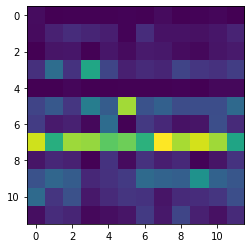

24000/24000 [==============================] - 2s 104us/sample


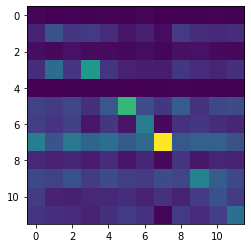

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_21 (Batc (None, 100, 16)           64        
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                6272      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32)               

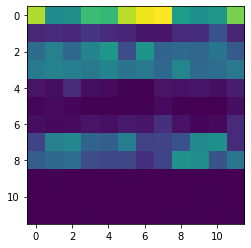

24000/24000 [==============================] - 3s 124us/sample


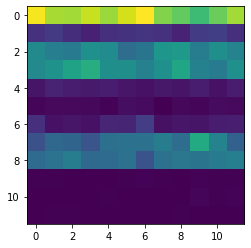

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 14s 592us/sample - loss: 2.4853 - acc: 0.1177 - val_loss: 2.4846 - val_acc: 0.1002
Epoch 12/12
24000/24000 [==============================] - 12s 493us/sample - loss: 2.4582 - acc: 0.1308 - val_loss: 2.4836 - val_acc: 0.0962
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 14s 593us/sample - loss: 2.4740 - acc: 0.1199 - val_loss: 2.4774 - val_acc: 0.1165
Epoch 14/14
24000/24000 [==============================] - 12s 496us/sample - loss: 2.4526 - acc: 0.1279 - val_loss: 2.4776 - val_acc: 0.1129
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 14s 604us/sample - loss: 2.4647 - acc: 0.1242 - val_loss: 2.4781 - val_acc: 0.1179
Epoch 16/16
24000/24000 [==============================] - 12s 517us/sample - loss: 2.4436 - acc: 0.1365 - val_loss: 2.4789 - val_acc: 0.1096
T

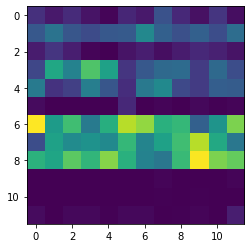

24000/24000 [==============================] - 3s 123us/sample


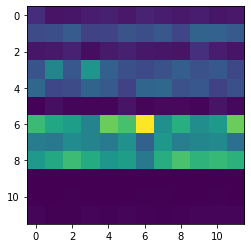

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 14s 593us/sample - loss: 2.4487 - acc: 0.1338 - val_loss: 2.4751 - val_acc: 0.1019
Epoch 22/22
24000/24000 [==============================] - 12s 495us/sample - loss: 2.4286 - acc: 0.1462 - val_loss: 2.4754 - val_acc: 0.0994
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 14s 595us/sample - loss: 2.4435 - acc: 0.1404 - val_loss: 2.4697 - val_acc: 0.1031
Epoch 24/24
24000/24000 [==============================] - 12s 497us/sample - loss: 2.4247 - acc: 0.1504 - val_loss: 2.4678 - val_acc: 0.1075
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 14s 592us/sample - loss: 2.4442 - acc: 0.1392 - val_loss: 2.4729 - val_acc: 0.1054
Epoch 26/26
24000/24000 [==============================] - 12s 495us/sample - loss: 2.4242 - acc: 0.1504 - val_loss: 2.4716 - val_acc: 0.1054
T

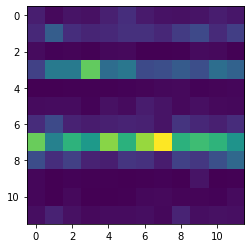

24000/24000 [==============================] - 3s 123us/sample


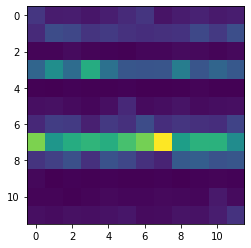

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 14s 593us/sample - loss: 2.4236 - acc: 0.1515 - val_loss: 2.4730 - val_acc: 0.0971
Epoch 32/32
24000/24000 [==============================] - 12s 492us/sample - loss: 2.4036 - acc: 0.1612 - val_loss: 2.4730 - val_acc: 0.1010
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 14s 595us/sample - loss: 2.4314 - acc: 0.1469 - val_loss: 2.4588 - val_acc: 0.1271
Epoch 34/34
24000/24000 [==============================] - 12s 495us/sample - loss: 2.4119 - acc: 0.1571 - val_loss: 2.4559 - val_acc: 0.1265
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 14s 594us/sample - loss: 2.4276 - acc: 0.1516 - val_loss: 2.4421 - val_acc: 0.1456
Epoch 36/36
24000/24000 [==============================] - 12s 495us/sample - loss: 2.4089 - acc: 0.1610 - val_loss: 2.4403 - val_acc: 0.1440
T

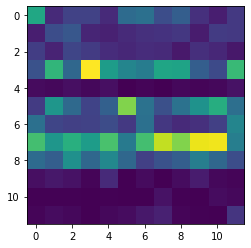

24000/24000 [==============================] - 3s 123us/sample


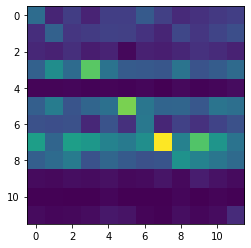

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 14s 590us/sample - loss: 2.4240 - acc: 0.1475 - val_loss: 2.4529 - val_acc: 0.1350
Epoch 42/42
24000/24000 [==============================] - 12s 498us/sample - loss: 2.4064 - acc: 0.1558 - val_loss: 2.4474 - val_acc: 0.1458
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 14s 591us/sample - loss: 2.4105 - acc: 0.1602 - val_loss: 2.4068 - val_acc: 0.1658
Epoch 44/44
24000/24000 [==============================] - 12s 496us/sample - loss: 2.3917 - acc: 0.1676 - val_loss: 2.4057 - val_acc: 0.1633
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 14s 596us/sample - loss: 2.4146 - acc: 0.1577 - val_loss: 2.4385 - val_acc: 0.1392
Epoch 46/46
24000/24000 [==============================] - 12s 495us/sample - loss: 2.3920 - acc: 0.1690 - val_loss: 2.4403 - val_acc: 0.1352
T

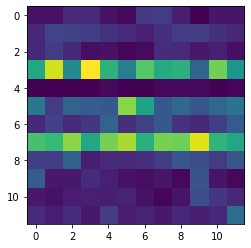

24000/24000 [==============================] - 3s 123us/sample


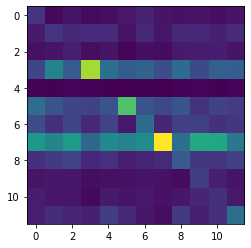

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 14s 595us/sample - loss: 2.3952 - acc: 0.1666 - val_loss: 2.4383 - val_acc: 0.1479
Epoch 52/52
24000/24000 [==============================] - 12s 494us/sample - loss: 2.3745 - acc: 0.1746 - val_loss: 2.4393 - val_acc: 0.1467
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 14s 594us/sample - loss: 2.4064 - acc: 0.1641 - val_loss: 2.4410 - val_acc: 0.1265
Epoch 54/54
24000/24000 [==============================] - 12s 507us/sample - loss: 2.3817 - acc: 0.1742 - val_loss: 2.4560 - val_acc: 0.1238
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 15s 611us/sample - loss: 2.3917 - acc: 0.1698 - val_loss: 2.4234 - val_acc: 0.1525
Epoch 56/56
24000/24000 [==============================] - 12s 512us/sample - loss: 2.3720 - acc: 0.1776 - val_loss: 2.4240 - val_acc: 0.1515
T

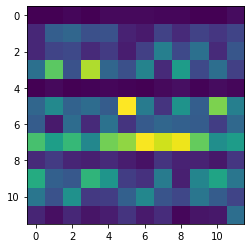

24000/24000 [==============================] - 3s 123us/sample


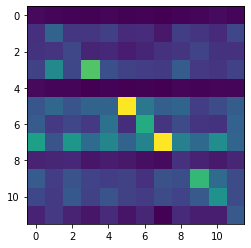

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 15s 612us/sample - loss: 2.3975 - acc: 0.1655 - val_loss: 2.4296 - val_acc: 0.1446
Epoch 62/62
24000/24000 [==============================] - 12s 513us/sample - loss: 2.3744 - acc: 0.1741 - val_loss: 2.4435 - val_acc: 0.1392
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 14s 604us/sample - loss: 2.3815 - acc: 0.1745 - val_loss: 2.3644 - val_acc: 0.1787
Epoch 64/64
24000/24000 [==============================] - 12s 507us/sample - loss: 2.3559 - acc: 0.1877 - val_loss: 2.3656 - val_acc: 0.1752
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 15s 609us/sample - loss: 2.3915 - acc: 0.1693 - val_loss: 2.4450 - val_acc: 0.1552
Epoch 66/66
24000/24000 [==============================] - 12s 507us/sample - loss: 2.3670 - acc: 0.1805 - val_loss: 2.4627 - val_acc: 0.1496
T

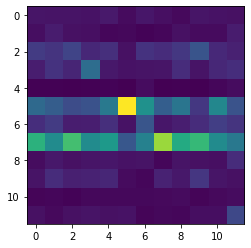

24000/24000 [==============================] - 3s 124us/sample


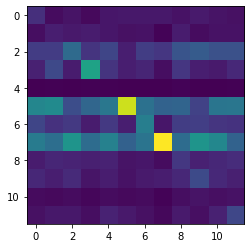

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 14s 598us/sample - loss: 2.3858 - acc: 0.1711 - val_loss: 2.4327 - val_acc: 0.1502
Epoch 72/72
24000/24000 [==============================] - 12s 516us/sample - loss: 2.3626 - acc: 0.1826 - val_loss: 2.4355 - val_acc: 0.1542
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 14s 599us/sample - loss: 2.3787 - acc: 0.1740 - val_loss: 2.4352 - val_acc: 0.1504
Epoch 74/74
24000/24000 [==============================] - 12s 501us/sample - loss: 2.3509 - acc: 0.1889 - val_loss: 2.4310 - val_acc: 0.1479
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 14s 599us/sample - loss: 2.3760 - acc: 0.1825 - val_loss: 2.4294 - val_acc: 0.1479
Epoch 76/76
24000/24000 [==============================] - 12s 501us/sample - loss: 2.3540 - acc: 0.1908 - val_loss: 2.4331 - val_acc: 0.1460
T

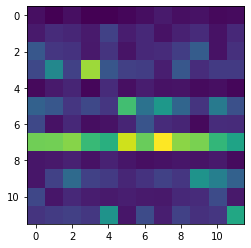

24000/24000 [==============================] - 3s 124us/sample


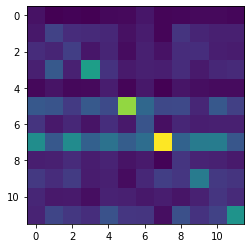

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 15s 606us/sample - loss: 2.3627 - acc: 0.1820 - val_loss: 2.4666 - val_acc: 0.1396
Epoch 82/82
24000/24000 [==============================] - 12s 508us/sample - loss: 2.3423 - acc: 0.1885 - val_loss: 2.4669 - val_acc: 0.1506
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 15s 607us/sample - loss: 2.3596 - acc: 0.1857 - val_loss: 2.4836 - val_acc: 0.1329
Epoch 84/84
24000/24000 [==============================] - 12s 505us/sample - loss: 2.3324 - acc: 0.1973 - val_loss: 2.4892 - val_acc: 0.1310
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 14s 602us/sample - loss: 2.3431 - acc: 0.1942 - val_loss: 2.4673 - val_acc: 0.1452
Epoch 86/86
24000/24000 [==============================] - 12s 503us/sample - loss: 2.3153 - acc: 0.2056 - val_loss: 2.4773 - val_acc: 0.1354
T

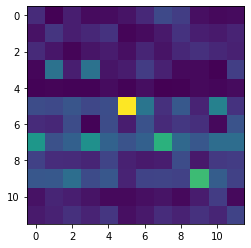

24000/24000 [==============================] - 3s 124us/sample


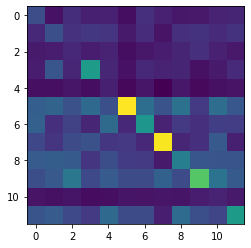

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 14s 598us/sample - loss: 2.3528 - acc: 0.1902 - val_loss: 2.4916 - val_acc: 0.1256
Epoch 92/92
24000/24000 [==============================] - 12s 503us/sample - loss: 2.3272 - acc: 0.2001 - val_loss: 2.5026 - val_acc: 0.1206
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 14s 599us/sample - loss: 2.3252 - acc: 0.2035 - val_loss: 2.4382 - val_acc: 0.1581
Epoch 94/94
24000/24000 [==============================] - 12s 505us/sample - loss: 2.2918 - acc: 0.2192 - val_loss: 2.4548 - val_acc: 0.1542
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 14s 601us/sample - loss: 2.3316 - acc: 0.2010 - val_loss: 2.4648 - val_acc: 0.1452
Epoch 96/96
24000/24000 [==============================] - 12s 503us/sample - loss: 2.3039 - acc: 0.2116 - val_loss: 2.4744 - val_acc: 0.1458
T

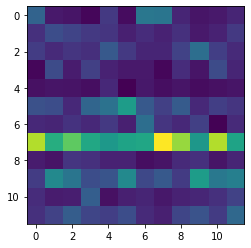

24000/24000 [==============================] - 3s 126us/sample


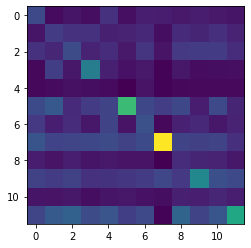

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_24 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_12 (LSTM)               (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_25 (Batc (None, 100, 32)           128       
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                8320      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32)               

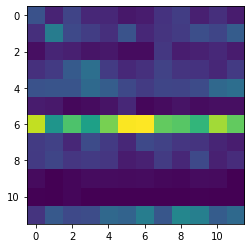

24000/24000 [==============================] - 4s 150us/sample


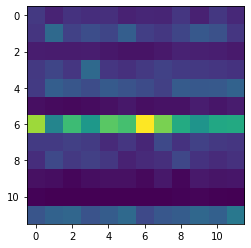

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 19s 778us/sample - loss: 2.4823 - acc: 0.1242 - val_loss: 2.4708 - val_acc: 0.1092
Epoch 12/12
24000/24000 [==============================] - 16s 685us/sample - loss: 2.4501 - acc: 0.1385 - val_loss: 2.4700 - val_acc: 0.1067
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 19s 782us/sample - loss: 2.4643 - acc: 0.1325 - val_loss: 2.4687 - val_acc: 0.1146
Epoch 14/14
24000/24000 [==============================] - 16s 685us/sample - loss: 2.4378 - acc: 0.1450 - val_loss: 2.4695 - val_acc: 0.1133
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 19s 784us/sample - loss: 2.4556 - acc: 0.1344 - val_loss: 2.4685 - val_acc: 0.1094
Epoch 16/16
24000/24000 [==============================] - 17s 692us/sample - loss: 2.4306 - acc: 0.1461 - val_loss: 2.4676 - val_acc: 0.1081
T

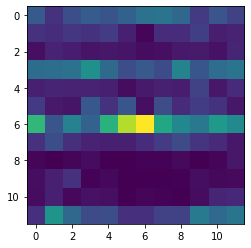

24000/24000 [==============================] - 4s 153us/sample


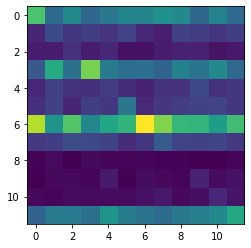

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 20s 825us/sample - loss: 2.4502 - acc: 0.1398 - val_loss: 2.4538 - val_acc: 0.1262
Epoch 22/22
24000/24000 [==============================] - 17s 700us/sample - loss: 2.4217 - acc: 0.1549 - val_loss: 2.4512 - val_acc: 0.1275
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 19s 792us/sample - loss: 2.4089 - acc: 0.1592 - val_loss: 2.4529 - val_acc: 0.1208
Epoch 24/24
24000/24000 [==============================] - 17s 691us/sample - loss: 2.3804 - acc: 0.1763 - val_loss: 2.4520 - val_acc: 0.1215
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 19s 793us/sample - loss: 2.4263 - acc: 0.1525 - val_loss: 2.4571 - val_acc: 0.1217
Epoch 26/26
24000/24000 [==============================] - 17s 695us/sample - loss: 2.3996 - acc: 0.1653 - val_loss: 2.4571 - val_acc: 0.1198
T

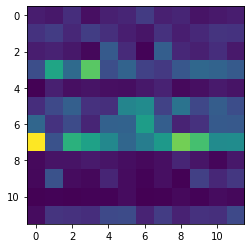

24000/24000 [==============================] - 4s 154us/sample


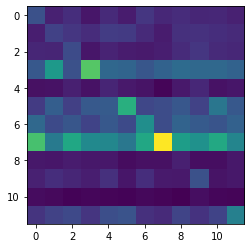

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 19s 799us/sample - loss: 2.4077 - acc: 0.1675 - val_loss: 2.4246 - val_acc: 0.1415
Epoch 32/32
24000/24000 [==============================] - 17s 699us/sample - loss: 2.3802 - acc: 0.1775 - val_loss: 2.4231 - val_acc: 0.1433
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 19s 799us/sample - loss: 2.4124 - acc: 0.1576 - val_loss: 2.4425 - val_acc: 0.1342
Epoch 34/34
24000/24000 [==============================] - 17s 702us/sample - loss: 2.3872 - acc: 0.1700 - val_loss: 2.4444 - val_acc: 0.1323
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 19s 800us/sample - loss: 2.4009 - acc: 0.1663 - val_loss: 2.4216 - val_acc: 0.1590
Epoch 36/36
24000/24000 [==============================] - 19s 783us/sample - loss: 2.3742 - acc: 0.1811 - val_loss: 2.4226 - val_acc: 0.1617
T

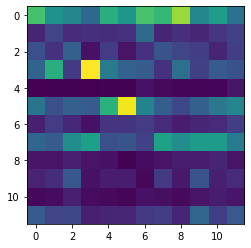

24000/24000 [==============================] - 4s 169us/sample


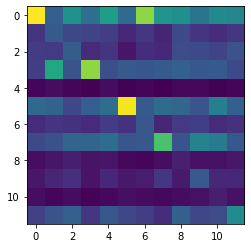

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 20s 844us/sample - loss: 2.4089 - acc: 0.1600 - val_loss: 2.4125 - val_acc: 0.1652
Epoch 42/42
24000/24000 [==============================] - 18s 760us/sample - loss: 2.3813 - acc: 0.1708 - val_loss: 2.4068 - val_acc: 0.1654
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 20s 831us/sample - loss: 2.3855 - acc: 0.1799 - val_loss: 2.3967 - val_acc: 0.1562
Epoch 44/44
24000/24000 [==============================] - 19s 788us/sample - loss: 2.3585 - acc: 0.1900 - val_loss: 2.3920 - val_acc: 0.1631
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 20s 843us/sample - loss: 2.3998 - acc: 0.1653 - val_loss: 2.4076 - val_acc: 0.1552
Epoch 46/46
24000/24000 [==============================] - 18s 733us/sample - loss: 2.3707 - acc: 0.1804 - val_loss: 2.4122 - val_acc: 0.1504
T

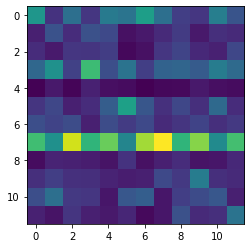

24000/24000 [==============================] - 4s 158us/sample


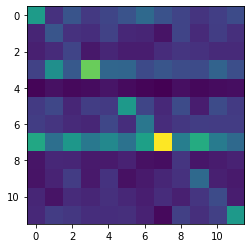

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 20s 840us/sample - loss: 2.3682 - acc: 0.1863 - val_loss: 2.4083 - val_acc: 0.1590
Epoch 52/52
24000/24000 [==============================] - 18s 742us/sample - loss: 2.3344 - acc: 0.1991 - val_loss: 2.4193 - val_acc: 0.1550
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 21s 882us/sample - loss: 2.4033 - acc: 0.1643 - val_loss: 2.4092 - val_acc: 0.1723
Epoch 54/54
24000/24000 [==============================] - 18s 765us/sample - loss: 2.3685 - acc: 0.1818 - val_loss: 2.4114 - val_acc: 0.1735
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 20s 840us/sample - loss: 2.3643 - acc: 0.1857 - val_loss: 2.4141 - val_acc: 0.1658
Epoch 56/56
24000/24000 [==============================] - 17s 719us/sample - loss: 2.3322 - acc: 0.2007 - val_loss: 2.4257 - val_acc: 0.1631
T

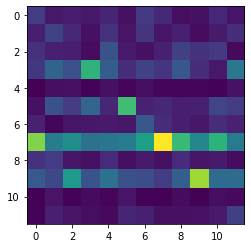

24000/24000 [==============================] - 4s 176us/sample


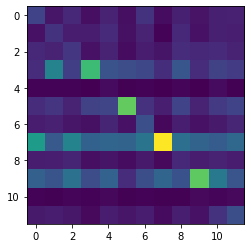

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 23s 946us/sample - loss: 2.3663 - acc: 0.1808 - val_loss: 2.4503 - val_acc: 0.1587
Epoch 62/62
24000/24000 [==============================] - 20s 822us/sample - loss: 2.3376 - acc: 0.1952 - val_loss: 2.4466 - val_acc: 0.1621
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 23s 938us/sample - loss: 2.3617 - acc: 0.1892 - val_loss: 2.4209 - val_acc: 0.1619
Epoch 64/64
24000/24000 [==============================] - 20s 838us/sample - loss: 2.3340 - acc: 0.2031 - val_loss: 2.4284 - val_acc: 0.1644
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 23s 939us/sample - loss: 2.3407 - acc: 0.1966 - val_loss: 2.3908 - val_acc: 0.1715
Epoch 66/66
24000/24000 [==============================] - 20s 840us/sample - loss: 2.3107 - acc: 0.2095 - val_loss: 2.3934 - val_acc: 0.1665
T

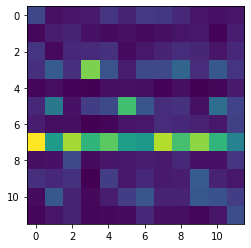

24000/24000 [==============================] - 5s 188us/sample


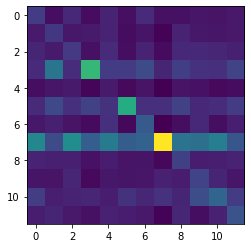

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 23s 945us/sample - loss: 2.3620 - acc: 0.1861 - val_loss: 2.3747 - val_acc: 0.1863
Epoch 72/72
24000/24000 [==============================] - 20s 843us/sample - loss: 2.3305 - acc: 0.1965 - val_loss: 2.3814 - val_acc: 0.1852
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 23s 946us/sample - loss: 2.3618 - acc: 0.1836 - val_loss: 2.4386 - val_acc: 0.1562
Epoch 74/74
24000/24000 [==============================] - 20s 818us/sample - loss: 2.3308 - acc: 0.1982 - val_loss: 2.4276 - val_acc: 0.1600
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 22s 927us/sample - loss: 2.3360 - acc: 0.1994 - val_loss: 2.3844 - val_acc: 0.1673
Epoch 76/76
24000/24000 [==============================] - 20s 845us/sample - loss: 2.3051 - acc: 0.2119 - val_loss: 2.3968 - val_acc: 0.1733
T

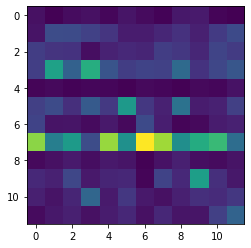

24000/24000 [==============================] - 4s 186us/sample


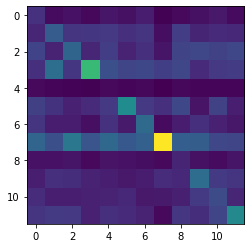

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 23s 950us/sample - loss: 2.3404 - acc: 0.1970 - val_loss: 2.4278 - val_acc: 0.1829
Epoch 82/82
24000/24000 [==============================] - 20s 849us/sample - loss: 2.3077 - acc: 0.2129 - val_loss: 2.4245 - val_acc: 0.1804
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 23s 956us/sample - loss: 2.3124 - acc: 0.2031 - val_loss: 2.4415 - val_acc: 0.1729
Epoch 84/84
24000/24000 [==============================] - 20s 845us/sample - loss: 2.2779 - acc: 0.2207 - val_loss: 2.4464 - val_acc: 0.1690
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 23s 957us/sample - loss: 2.3220 - acc: 0.2060 - val_loss: 2.4352 - val_acc: 0.1792
Epoch 86/86
24000/24000 [==============================] - 20s 848us/sample - loss: 2.2863 - acc: 0.2223 - val_loss: 2.4483 - val_acc: 0.1752
T

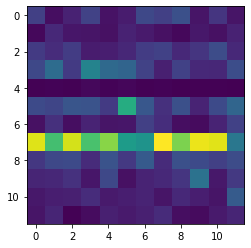

24000/24000 [==============================] - 5s 206us/sample


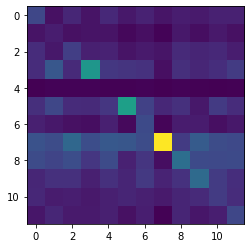

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3274 - acc: 0.2066 - val_loss: 2.4539 - val_acc: 0.1690
Epoch 92/92
24000/24000 [==============================] - 20s 846us/sample - loss: 2.2939 - acc: 0.2164 - val_loss: 2.4682 - val_acc: 0.1654
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 23s 967us/sample - loss: 2.3213 - acc: 0.2076 - val_loss: 2.4771 - val_acc: 0.1519
Epoch 94/94
24000/24000 [==============================] - 21s 858us/sample - loss: 2.2857 - acc: 0.2230 - val_loss: 2.4936 - val_acc: 0.1510
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 23s 969us/sample - loss: 2.3179 - acc: 0.2050 - val_loss: 2.5107 - val_acc: 0.1548
Epoch 96/96
24000/24000 [==============================] - 21s 860us/sample - loss: 2.2862 - acc: 0.2192 - val_loss: 2.4972 - val_acc: 0.1606
Tra

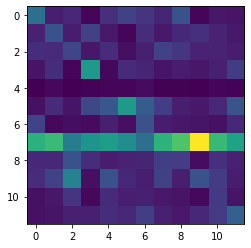

24000/24000 [==============================] - 5s 193us/sample


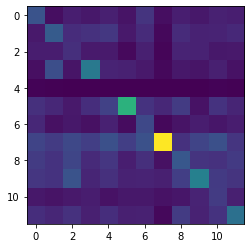

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_28 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_29 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_30 (Batc (None, 32)                128       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_31 (Batc (None, 32)               

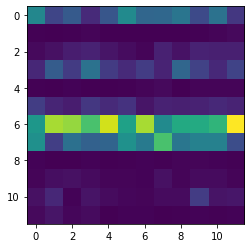

24000/24000 [==============================] - 6s 268us/sample


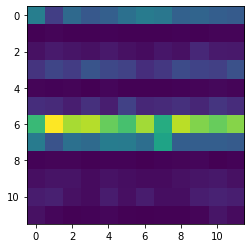

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4596 - acc: 0.1382 - val_loss: 2.4765 - val_acc: 0.1094
Epoch 12/12
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.4189 - acc: 0.1541 - val_loss: 2.4755 - val_acc: 0.1183
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4432 - acc: 0.1410 - val_loss: 2.4685 - val_acc: 0.1150
Epoch 14/14
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.4025 - acc: 0.1563 - val_loss: 2.4666 - val_acc: 0.1096
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4315 - acc: 0.1500 - val_loss: 2.4840 - val_acc: 0.1021
Epoch 16/16
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3960 - acc: 0.1685 - val_loss: 2.4855 - val_acc: 0.1019
Train on 2400

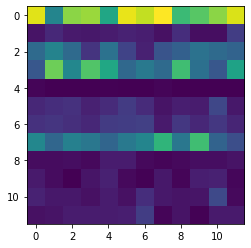

24000/24000 [==============================] - 6s 249us/sample


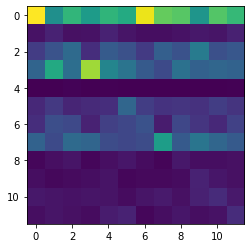

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3937 - acc: 0.1641 - val_loss: 2.4666 - val_acc: 0.1133
Epoch 22/22
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3561 - acc: 0.1872 - val_loss: 2.4571 - val_acc: 0.1194
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4124 - acc: 0.1645 - val_loss: 2.4766 - val_acc: 0.0973
Epoch 24/24
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3772 - acc: 0.1778 - val_loss: 2.4698 - val_acc: 0.1010
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4252 - acc: 0.1444 - val_loss: 2.4673 - val_acc: 0.1262
Epoch 26/26
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3903 - acc: 0.1617 - val_loss: 2.4634 - val_acc: 0.1208
Train on 2400

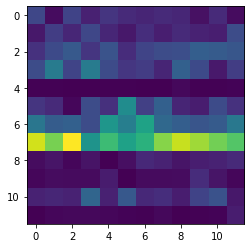

24000/24000 [==============================] - 6s 263us/sample


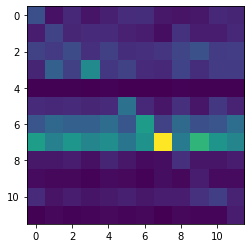

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3816 - acc: 0.1777 - val_loss: 2.4547 - val_acc: 0.1310
Epoch 32/32
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3404 - acc: 0.1956 - val_loss: 2.4476 - val_acc: 0.1410
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3736 - acc: 0.1828 - val_loss: 2.4771 - val_acc: 0.1046
Epoch 34/34
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3358 - acc: 0.1972 - val_loss: 2.4784 - val_acc: 0.1021
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3717 - acc: 0.1766 - val_loss: 2.4484 - val_acc: 0.1404
Epoch 36/36
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3339 - acc: 0.1946 - val_loss: 2.4113 - val_acc: 0.1562
Train on 2400

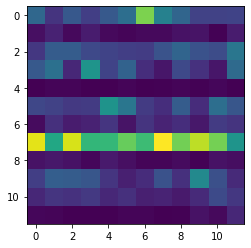

24000/24000 [==============================] - 6s 261us/sample


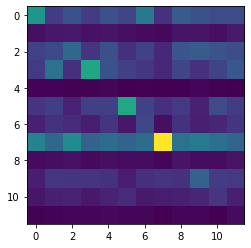

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3653 - acc: 0.1827 - val_loss: 2.4316 - val_acc: 0.1367
Epoch 42/42
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3265 - acc: 0.2007 - val_loss: 2.4292 - val_acc: 0.1442
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3567 - acc: 0.1864 - val_loss: 2.3962 - val_acc: 0.1635
Epoch 44/44
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3222 - acc: 0.2010 - val_loss: 2.3952 - val_acc: 0.1665
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3688 - acc: 0.1817 - val_loss: 2.4601 - val_acc: 0.1221
Epoch 46/46
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3273 - acc: 0.2008 - val_loss: 2.4730 - val_acc: 0.1240
Train on 2400

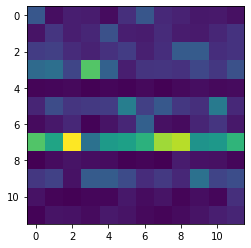

24000/24000 [==============================] - 6s 266us/sample


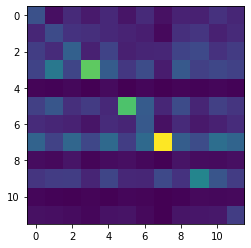

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3278 - acc: 0.2067 - val_loss: 2.4819 - val_acc: 0.1296
Epoch 52/52
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2810 - acc: 0.2262 - val_loss: 2.4807 - val_acc: 0.1360
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3142 - acc: 0.2085 - val_loss: 2.3817 - val_acc: 0.1644
Epoch 54/54
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2676 - acc: 0.2277 - val_loss: 2.3997 - val_acc: 0.1594
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3203 - acc: 0.2017 - val_loss: 2.4143 - val_acc: 0.1587
Epoch 56/56
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.2796 - acc: 0.2161 - val_loss: 2.4158 - val_acc: 0.1642
Train on 2400

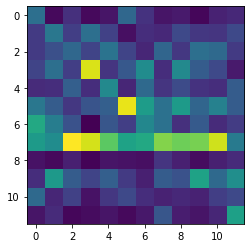

24000/24000 [==============================] - 6s 266us/sample


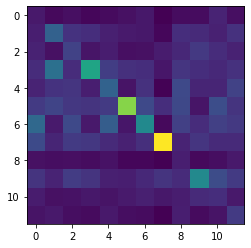

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3221 - acc: 0.2013 - val_loss: 2.4429 - val_acc: 0.1598
Epoch 62/62
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2784 - acc: 0.2179 - val_loss: 2.4291 - val_acc: 0.1581
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3069 - acc: 0.2141 - val_loss: 2.3806 - val_acc: 0.1806
Epoch 64/64
24000/24000 [==============================] - 23s 940us/sample - loss: 2.2634 - acc: 0.2294 - val_loss: 2.4043 - val_acc: 0.1750
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.2896 - acc: 0.2170 - val_loss: 2.4284 - val_acc: 0.1652
Epoch 66/66
24000/24000 [==============================] - 22s 918us/sample - loss: 2.2459 - acc: 0.2342 - val_loss: 2.4265 - val_acc: 0.1694
Train on 

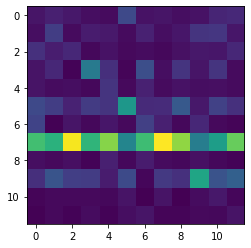

24000/24000 [==============================] - 5s 227us/sample


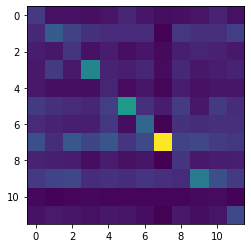

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.2752 - acc: 0.2228 - val_loss: 2.3871 - val_acc: 0.1935
Epoch 72/72
24000/24000 [==============================] - 23s 938us/sample - loss: 2.2272 - acc: 0.2406 - val_loss: 2.4059 - val_acc: 0.1887
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.2853 - acc: 0.2105 - val_loss: 2.4524 - val_acc: 0.1619
Epoch 74/74
24000/24000 [==============================] - 22s 922us/sample - loss: 2.2407 - acc: 0.2330 - val_loss: 2.4618 - val_acc: 0.1598
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2870 - acc: 0.2150 - val_loss: 2.4524 - val_acc: 0.1475
Epoch 76/76
24000/24000 [==============================] - 22s 923us/sample - loss: 2.2396 - acc: 0.2343 - val_loss: 2.4423 - val_acc: 0.1517
Train o

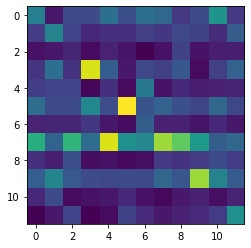

24000/24000 [==============================] - 5s 226us/sample


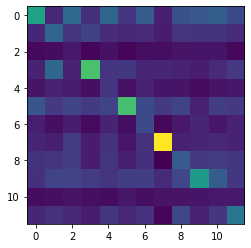

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2726 - acc: 0.2266 - val_loss: 2.3949 - val_acc: 0.1863
Epoch 82/82
24000/24000 [==============================] - 22s 925us/sample - loss: 2.2254 - acc: 0.2438 - val_loss: 2.4179 - val_acc: 0.1775
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.2537 - acc: 0.2362 - val_loss: 2.4118 - val_acc: 0.1931
Epoch 84/84
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.2079 - acc: 0.2520 - val_loss: 2.3963 - val_acc: 0.1998
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.2629 - acc: 0.2288 - val_loss: 2.4056 - val_acc: 0.1744
Epoch 86/86
24000/24000 [==============================] - 22s 925us/sample - loss: 2.2188 - acc: 0.2473 - val_loss: 2.4169 - val_acc: 0.1771
Train on 

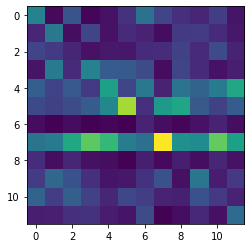

24000/24000 [==============================] - 6s 232us/sample


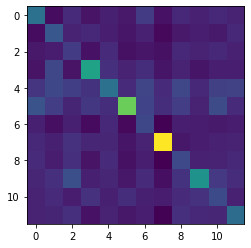

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.2509 - acc: 0.2257 - val_loss: 2.3932 - val_acc: 0.1885
Epoch 92/92
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.2034 - acc: 0.2454 - val_loss: 2.3859 - val_acc: 0.1975
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2370 - acc: 0.2402 - val_loss: 2.3866 - val_acc: 0.1877
Epoch 94/94
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.1908 - acc: 0.2585 - val_loss: 2.3974 - val_acc: 0.1885
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2509 - acc: 0.2263 - val_loss: 2.4558 - val_acc: 0.1708
Epoch 96/96
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2047 - acc: 0.2461 - val_loss: 2.4633 - val_acc: 0.1663
Train on 2400

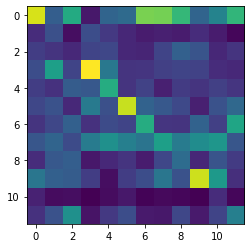

24000/24000 [==============================] - 6s 258us/sample


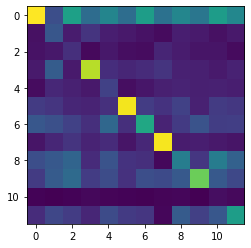

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_32 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 8)            1088      
_________________________________________________________________
batch_normalization_33 (Batc (None, 100, 8)            32        
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                18688     
_________________________________________________________________
batch_normalization_34 (Batc (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_35 (Batc (None, 32)               

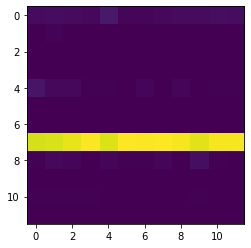

24000/24000 [==============================] - 5s 202us/sample


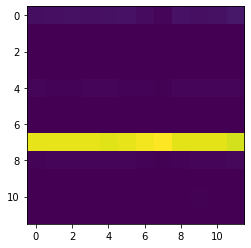

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 20s 852us/sample - loss: 2.4839 - acc: 0.1133 - val_loss: 2.4855 - val_acc: 0.0848
Epoch 12/12
24000/24000 [==============================] - 18s 752us/sample - loss: 2.4628 - acc: 0.1241 - val_loss: 2.4866 - val_acc: 0.0827
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 20s 842us/sample - loss: 2.4780 - acc: 0.1205 - val_loss: 2.4883 - val_acc: 0.0835
Epoch 14/14
24000/24000 [==============================] - 18s 731us/sample - loss: 2.4561 - acc: 0.1335 - val_loss: 2.4898 - val_acc: 0.0825
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 20s 854us/sample - loss: 2.4648 - acc: 0.1287 - val_loss: 2.4883 - val_acc: 0.0860
Epoch 16/16
24000/24000 [==============================] - 18s 731us/sample - loss: 2.4438 - acc: 0.1387 - val_loss: 2.4905 - val_acc: 0.0852
T

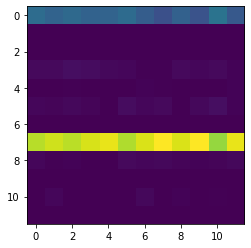

24000/24000 [==============================] - 5s 202us/sample


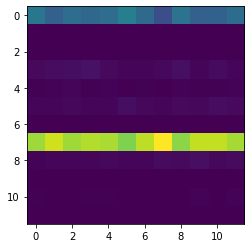

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 20s 848us/sample - loss: 2.4583 - acc: 0.1241 - val_loss: 2.4869 - val_acc: 0.0858
Epoch 22/22
24000/24000 [==============================] - 18s 737us/sample - loss: 2.4367 - acc: 0.1362 - val_loss: 2.4847 - val_acc: 0.0819
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 20s 845us/sample - loss: 2.4454 - acc: 0.1336 - val_loss: 2.4885 - val_acc: 0.1071
Epoch 24/24
24000/24000 [==============================] - 18s 738us/sample - loss: 2.4242 - acc: 0.1482 - val_loss: 2.4887 - val_acc: 0.1017
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 20s 845us/sample - loss: 2.4433 - acc: 0.1373 - val_loss: 2.4845 - val_acc: 0.0981
Epoch 26/26
24000/24000 [==============================] - 18s 742us/sample - loss: 2.4228 - acc: 0.1520 - val_loss: 2.4830 - val_acc: 0.0985
T

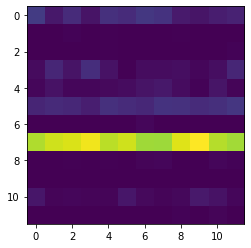

24000/24000 [==============================] - 5s 199us/sample


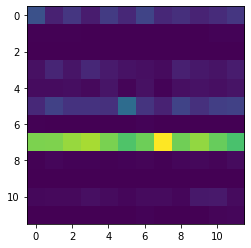

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 20s 854us/sample - loss: 2.4191 - acc: 0.1560 - val_loss: 2.4788 - val_acc: 0.1104
Epoch 32/32
24000/24000 [==============================] - 18s 735us/sample - loss: 2.3953 - acc: 0.1657 - val_loss: 2.4867 - val_acc: 0.1050
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 20s 826us/sample - loss: 2.4130 - acc: 0.1597 - val_loss: 2.4879 - val_acc: 0.1067
Epoch 34/34
24000/24000 [==============================] - 17s 701us/sample - loss: 2.3890 - acc: 0.1670 - val_loss: 2.4964 - val_acc: 0.1079
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 21s 860us/sample - loss: 2.4140 - acc: 0.1597 - val_loss: 2.4972 - val_acc: 0.0981
Epoch 36/36
24000/24000 [==============================] - 18s 732us/sample - loss: 2.3896 - acc: 0.1723 - val_loss: 2.4997 - val_acc: 0.1058
T

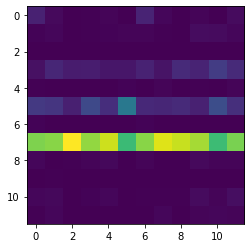

24000/24000 [==============================] - 5s 204us/sample


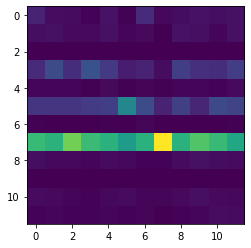

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 21s 855us/sample - loss: 2.3888 - acc: 0.1737 - val_loss: 2.5105 - val_acc: 0.1052
Epoch 42/42
24000/24000 [==============================] - 18s 740us/sample - loss: 2.3600 - acc: 0.1874 - val_loss: 2.5237 - val_acc: 0.1052
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 21s 859us/sample - loss: 2.3730 - acc: 0.1802 - val_loss: 2.4823 - val_acc: 0.1185
Epoch 44/44
24000/24000 [==============================] - 18s 743us/sample - loss: 2.3455 - acc: 0.1910 - val_loss: 2.5021 - val_acc: 0.1202
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 20s 853us/sample - loss: 2.3847 - acc: 0.1761 - val_loss: 2.5238 - val_acc: 0.0971
Epoch 46/46
24000/24000 [==============================] - 18s 749us/sample - loss: 2.3610 - acc: 0.1864 - val_loss: 2.5836 - val_acc: 0.0827
T

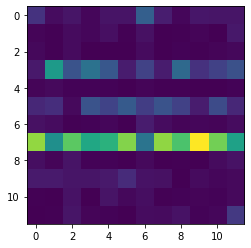

24000/24000 [==============================] - 5s 200us/sample


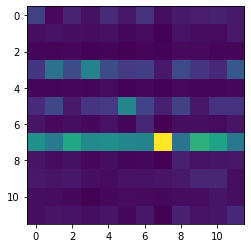

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 21s 862us/sample - loss: 2.3747 - acc: 0.1787 - val_loss: 2.4697 - val_acc: 0.1275
Epoch 52/52
24000/24000 [==============================] - 18s 749us/sample - loss: 2.3459 - acc: 0.1932 - val_loss: 2.4869 - val_acc: 0.1331
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 21s 868us/sample - loss: 2.3696 - acc: 0.1785 - val_loss: 2.4610 - val_acc: 0.1412
Epoch 54/54
24000/24000 [==============================] - 18s 746us/sample - loss: 2.3389 - acc: 0.1935 - val_loss: 2.4894 - val_acc: 0.1348
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 21s 860us/sample - loss: 2.3565 - acc: 0.1874 - val_loss: 2.4439 - val_acc: 0.1508
Epoch 56/56
24000/24000 [==============================] - 18s 745us/sample - loss: 2.3273 - acc: 0.1995 - val_loss: 2.4653 - val_acc: 0.1373
T

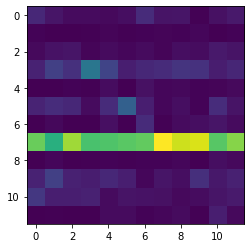

24000/24000 [==============================] - 5s 203us/sample


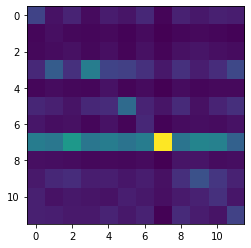

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 21s 866us/sample - loss: 2.3797 - acc: 0.1705 - val_loss: 2.4627 - val_acc: 0.1304
Epoch 62/62
24000/24000 [==============================] - 18s 746us/sample - loss: 2.3523 - acc: 0.1826 - val_loss: 2.4941 - val_acc: 0.1258
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 21s 863us/sample - loss: 2.3669 - acc: 0.1785 - val_loss: 2.4374 - val_acc: 0.1402
Epoch 64/64
24000/24000 [==============================] - 18s 746us/sample - loss: 2.3396 - acc: 0.1892 - val_loss: 2.4346 - val_acc: 0.1496
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 21s 872us/sample - loss: 2.3578 - acc: 0.1796 - val_loss: 2.4428 - val_acc: 0.1440
Epoch 66/66
24000/24000 [==============================] - 18s 755us/sample - loss: 2.3317 - acc: 0.1912 - val_loss: 2.4543 - val_acc: 0.1454
T

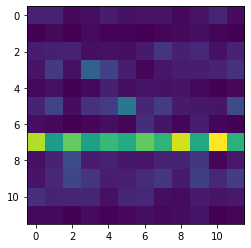

24000/24000 [==============================] - 5s 203us/sample


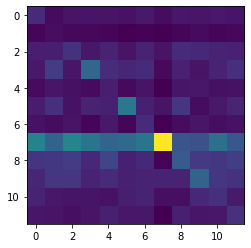

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 21s 861us/sample - loss: 2.3373 - acc: 0.1893 - val_loss: 2.4243 - val_acc: 0.1583
Epoch 72/72
24000/24000 [==============================] - 18s 750us/sample - loss: 2.3095 - acc: 0.2020 - val_loss: 2.4500 - val_acc: 0.1558
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 21s 865us/sample - loss: 2.3410 - acc: 0.1950 - val_loss: 2.5129 - val_acc: 0.1308
Epoch 74/74
24000/24000 [==============================] - 18s 751us/sample - loss: 2.3134 - acc: 0.2056 - val_loss: 2.5243 - val_acc: 0.1281
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 21s 855us/sample - loss: 2.3477 - acc: 0.1883 - val_loss: 2.4299 - val_acc: 0.1556
Epoch 76/76
24000/24000 [==============================] - 18s 752us/sample - loss: 2.3177 - acc: 0.2032 - val_loss: 2.4448 - val_acc: 0.1527
T

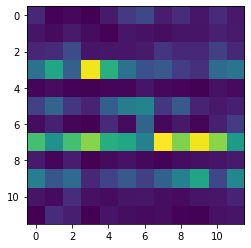

24000/24000 [==============================] - 5s 195us/sample


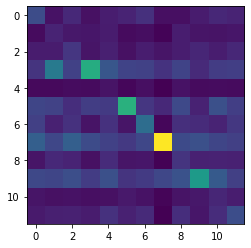

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 21s 859us/sample - loss: 2.3394 - acc: 0.1959 - val_loss: 2.4376 - val_acc: 0.1521
Epoch 82/82
24000/24000 [==============================] - 18s 749us/sample - loss: 2.3101 - acc: 0.2086 - val_loss: 2.4637 - val_acc: 0.1492
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 19s 805us/sample - loss: 2.3467 - acc: 0.1895 - val_loss: 2.5123 - val_acc: 0.1283
Epoch 84/84
24000/24000 [==============================] - 16s 676us/sample - loss: 2.3159 - acc: 0.2016 - val_loss: 2.5219 - val_acc: 0.1327
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 20s 838us/sample - loss: 2.3262 - acc: 0.1996 - val_loss: 2.4924 - val_acc: 0.1427
Epoch 86/86
24000/24000 [==============================] - 18s 732us/sample - loss: 2.2951 - acc: 0.2135 - val_loss: 2.4943 - val_acc: 0.1440
T

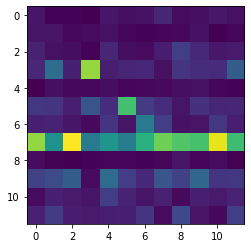

24000/24000 [==============================] - 5s 208us/sample


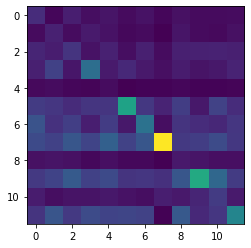

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 21s 856us/sample - loss: 2.3289 - acc: 0.1974 - val_loss: 2.4692 - val_acc: 0.1383
Epoch 92/92
24000/24000 [==============================] - 18s 743us/sample - loss: 2.3016 - acc: 0.2074 - val_loss: 2.4795 - val_acc: 0.1390
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 21s 860us/sample - loss: 2.3028 - acc: 0.2117 - val_loss: 2.5444 - val_acc: 0.1177
Epoch 94/94
24000/24000 [==============================] - 18s 757us/sample - loss: 2.2750 - acc: 0.2199 - val_loss: 2.5620 - val_acc: 0.1175
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 21s 866us/sample - loss: 2.3004 - acc: 0.2117 - val_loss: 2.5183 - val_acc: 0.1279
Epoch 96/96
24000/24000 [==============================] - 18s 758us/sample - loss: 2.2758 - acc: 0.2215 - val_loss: 2.5212 - val_acc: 0.1365
T

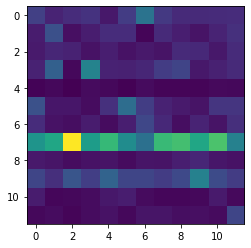

24000/24000 [==============================] - 5s 203us/sample


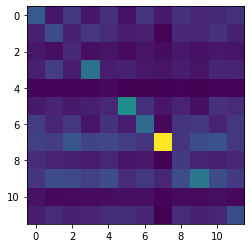

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_36 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_18 (LSTM)               (None, 100, 16)           2688      
_________________________________________________________________
batch_normalization_37 (Batc (None, 100, 16)           64        
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                20736     
_________________________________________________________________
batch_normalization_38 (Batc (None, 64)                256       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32)               

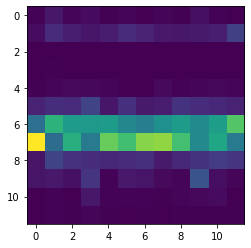

24000/24000 [==============================] - 5s 227us/sample


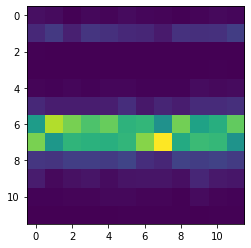

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 22s 930us/sample - loss: 2.4568 - acc: 0.1328 - val_loss: 2.4807 - val_acc: 0.0898
Epoch 12/12
24000/24000 [==============================] - 20s 815us/sample - loss: 2.4276 - acc: 0.1461 - val_loss: 2.4762 - val_acc: 0.0929
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 22s 929us/sample - loss: 2.4494 - acc: 0.1377 - val_loss: 2.4734 - val_acc: 0.1096
Epoch 14/14
24000/24000 [==============================] - 20s 814us/sample - loss: 2.4200 - acc: 0.1512 - val_loss: 2.4741 - val_acc: 0.0906
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 22s 933us/sample - loss: 2.4344 - acc: 0.1432 - val_loss: 2.4631 - val_acc: 0.1071
Epoch 16/16
24000/24000 [==============================] - 20s 816us/sample - loss: 2.4066 - acc: 0.1593 - val_loss: 2.4593 - val_acc: 0.1112
T

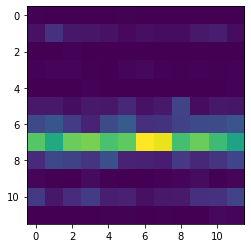

24000/24000 [==============================] - 5s 227us/sample


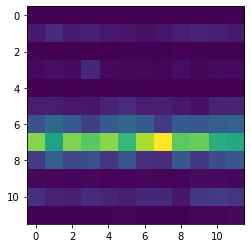

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 22s 925us/sample - loss: 2.4322 - acc: 0.1480 - val_loss: 2.4863 - val_acc: 0.0890
Epoch 22/22
24000/24000 [==============================] - 20s 816us/sample - loss: 2.4048 - acc: 0.1633 - val_loss: 2.4899 - val_acc: 0.0979
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 22s 934us/sample - loss: 2.4080 - acc: 0.1613 - val_loss: 2.4990 - val_acc: 0.1031
Epoch 24/24
24000/24000 [==============================] - 20s 821us/sample - loss: 2.3815 - acc: 0.1732 - val_loss: 2.4969 - val_acc: 0.0950
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 22s 934us/sample - loss: 2.4199 - acc: 0.1573 - val_loss: 2.4861 - val_acc: 0.1138
Epoch 26/26
24000/24000 [==============================] - 19s 811us/sample - loss: 2.3914 - acc: 0.1693 - val_loss: 2.4650 - val_acc: 0.1327
T

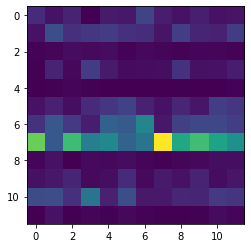

24000/24000 [==============================] - 6s 230us/sample


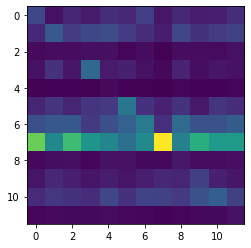

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 22s 921us/sample - loss: 2.4025 - acc: 0.1648 - val_loss: 2.4537 - val_acc: 0.1471
Epoch 32/32
24000/24000 [==============================] - 19s 803us/sample - loss: 2.3726 - acc: 0.1814 - val_loss: 2.4847 - val_acc: 0.1429
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 22s 918us/sample - loss: 2.3795 - acc: 0.1787 - val_loss: 2.4810 - val_acc: 0.1219
Epoch 34/34
24000/24000 [==============================] - 19s 806us/sample - loss: 2.3492 - acc: 0.1919 - val_loss: 2.4760 - val_acc: 0.1308
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 22s 919us/sample - loss: 2.3864 - acc: 0.1757 - val_loss: 2.4741 - val_acc: 0.1229
Epoch 36/36
24000/24000 [==============================] - 19s 810us/sample - loss: 2.3511 - acc: 0.1926 - val_loss: 2.4785 - val_acc: 0.1306
T

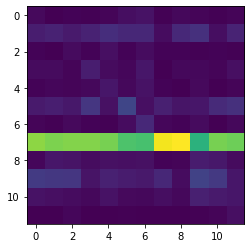

24000/24000 [==============================] - 5s 213us/sample


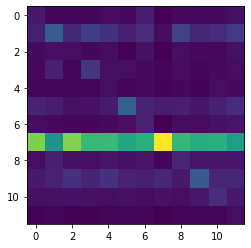

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 22s 911us/sample - loss: 2.3597 - acc: 0.1914 - val_loss: 2.4683 - val_acc: 0.1427
Epoch 42/42
24000/24000 [==============================] - 19s 808us/sample - loss: 2.3281 - acc: 0.2016 - val_loss: 2.4285 - val_acc: 0.1538
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 21s 892us/sample - loss: 2.3659 - acc: 0.1857 - val_loss: 2.4608 - val_acc: 0.1363
Epoch 44/44
24000/24000 [==============================] - 19s 807us/sample - loss: 2.3340 - acc: 0.1987 - val_loss: 2.5482 - val_acc: 0.1398
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 22s 919us/sample - loss: 2.3474 - acc: 0.1939 - val_loss: 2.5569 - val_acc: 0.1269
Epoch 46/46
24000/24000 [==============================] - 19s 812us/sample - loss: 2.3129 - acc: 0.2085 - val_loss: 2.5569 - val_acc: 0.1365
T

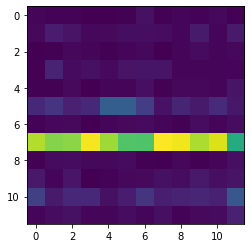

24000/24000 [==============================] - 5s 218us/sample


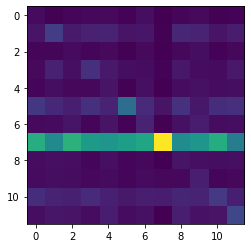

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 22s 921us/sample - loss: 2.3540 - acc: 0.1893 - val_loss: 2.5163 - val_acc: 0.1319
Epoch 52/52
24000/24000 [==============================] - 19s 810us/sample - loss: 2.3220 - acc: 0.2002 - val_loss: 2.5587 - val_acc: 0.1290
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 22s 920us/sample - loss: 2.3499 - acc: 0.1896 - val_loss: 2.4723 - val_acc: 0.1458
Epoch 54/54
24000/24000 [==============================] - 20s 817us/sample - loss: 2.3183 - acc: 0.2026 - val_loss: 2.4922 - val_acc: 0.1446
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 23s 940us/sample - loss: 2.3496 - acc: 0.1918 - val_loss: 2.5031 - val_acc: 0.1417
Epoch 56/56
24000/24000 [==============================] - 19s 808us/sample - loss: 2.3163 - acc: 0.2057 - val_loss: 2.5325 - val_acc: 0.1398
T

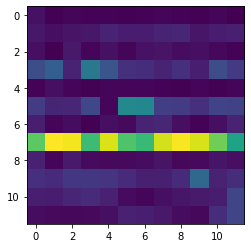

24000/24000 [==============================] - 6s 232us/sample


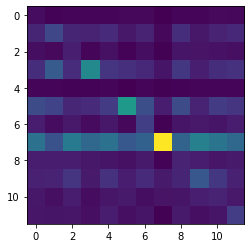

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 22s 924us/sample - loss: 2.3211 - acc: 0.2037 - val_loss: 2.5265 - val_acc: 0.1283
Epoch 62/62
24000/24000 [==============================] - 20s 823us/sample - loss: 2.2874 - acc: 0.2156 - val_loss: 2.5711 - val_acc: 0.1248
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 22s 927us/sample - loss: 2.3348 - acc: 0.1967 - val_loss: 2.5038 - val_acc: 0.1279
Epoch 64/64
24000/24000 [==============================] - 20s 813us/sample - loss: 2.2989 - acc: 0.2109 - val_loss: 2.5022 - val_acc: 0.1308
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 22s 922us/sample - loss: 2.3229 - acc: 0.2022 - val_loss: 2.5381 - val_acc: 0.1292
Epoch 66/66
24000/24000 [==============================] - 20s 818us/sample - loss: 2.2879 - acc: 0.2163 - val_loss: 2.5661 - val_acc: 0.1290
T

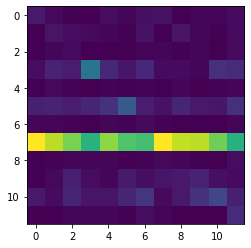

24000/24000 [==============================] - 5s 224us/sample


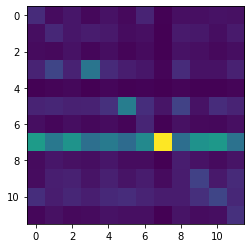

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 22s 929us/sample - loss: 2.3035 - acc: 0.2154 - val_loss: 2.4731 - val_acc: 0.1608
Epoch 72/72
24000/24000 [==============================] - 20s 816us/sample - loss: 2.2665 - acc: 0.2271 - val_loss: 2.5405 - val_acc: 0.1533
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 22s 934us/sample - loss: 2.3097 - acc: 0.2130 - val_loss: 2.4976 - val_acc: 0.1592
Epoch 74/74
24000/24000 [==============================] - 19s 801us/sample - loss: 2.2727 - acc: 0.2254 - val_loss: 2.4987 - val_acc: 0.1587
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 22s 924us/sample - loss: 2.3093 - acc: 0.2028 - val_loss: 2.5265 - val_acc: 0.1298
Epoch 76/76
24000/24000 [==============================] - 20s 820us/sample - loss: 2.2705 - acc: 0.2188 - val_loss: 2.5540 - val_acc: 0.1275
T

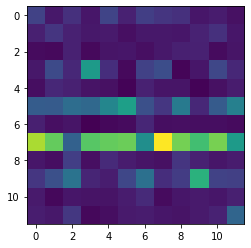

24000/24000 [==============================] - 5s 208us/sample


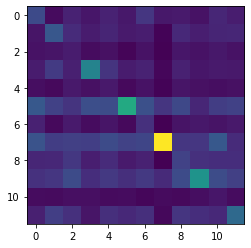

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 22s 928us/sample - loss: 2.3214 - acc: 0.2058 - val_loss: 2.4492 - val_acc: 0.1608
Epoch 82/82
24000/24000 [==============================] - 19s 803us/sample - loss: 2.2846 - acc: 0.2201 - val_loss: 2.5200 - val_acc: 0.1429
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 22s 921us/sample - loss: 2.3177 - acc: 0.2017 - val_loss: 2.4432 - val_acc: 0.1504
Epoch 84/84
24000/24000 [==============================] - 20s 813us/sample - loss: 2.2839 - acc: 0.2150 - val_loss: 2.4408 - val_acc: 0.1575
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 22s 934us/sample - loss: 2.3201 - acc: 0.2049 - val_loss: 2.4271 - val_acc: 0.1644
Epoch 86/86
24000/24000 [==============================] - 20s 826us/sample - loss: 2.2806 - acc: 0.2231 - val_loss: 2.5228 - val_acc: 0.1404
T

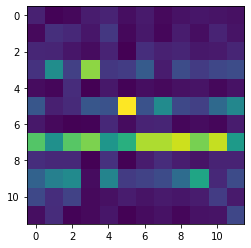

24000/24000 [==============================] - 5s 228us/sample


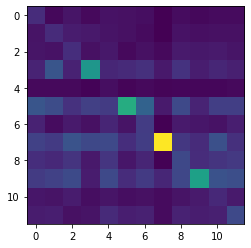

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 23s 938us/sample - loss: 2.3074 - acc: 0.2160 - val_loss: 2.4621 - val_acc: 0.1644
Epoch 92/92
24000/24000 [==============================] - 20s 830us/sample - loss: 2.2667 - acc: 0.2297 - val_loss: 2.4438 - val_acc: 0.1637
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 22s 933us/sample - loss: 2.2965 - acc: 0.2120 - val_loss: 2.3868 - val_acc: 0.1792
Epoch 94/94
24000/24000 [==============================] - 20s 817us/sample - loss: 2.2634 - acc: 0.2277 - val_loss: 2.3994 - val_acc: 0.1765
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 23s 946us/sample - loss: 2.3083 - acc: 0.2094 - val_loss: 2.4602 - val_acc: 0.1498
Epoch 96/96
24000/24000 [==============================] - 20s 828us/sample - loss: 2.2706 - acc: 0.2278 - val_loss: 2.4979 - val_acc: 0.1440
T

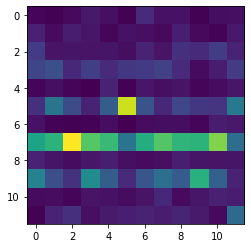

24000/24000 [==============================] - 5s 222us/sample


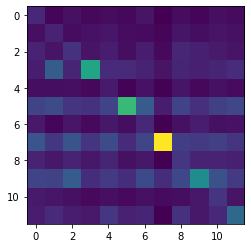

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_40 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_20 (LSTM)               (None, 100, 32)           7424      
_________________________________________________________________
batch_normalization_41 (Batc (None, 100, 32)           128       
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_42 (Batc (None, 64)                256       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32)              

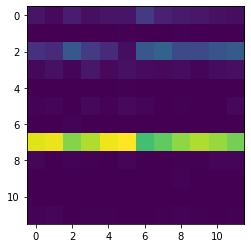

24000/24000 [==============================] - 6s 260us/sample


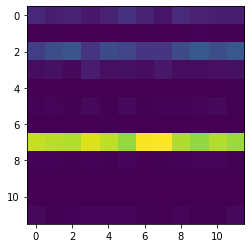

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4421 - acc: 0.1486 - val_loss: 2.4902 - val_acc: 0.0965
Epoch 12/12
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.4010 - acc: 0.1662 - val_loss: 2.4921 - val_acc: 0.0958
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4313 - acc: 0.1497 - val_loss: 2.5026 - val_acc: 0.0894
Epoch 14/14
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3907 - acc: 0.1709 - val_loss: 2.5078 - val_acc: 0.0952
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.4355 - acc: 0.1468 - val_loss: 2.5046 - val_acc: 0.0896
Epoch 16/16
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3976 - acc: 0.1612 - val_loss: 2.5082 - val_acc: 0.0877
Train on 2400

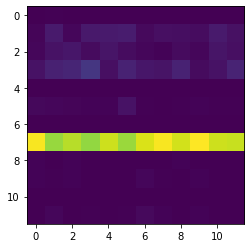

24000/24000 [==============================] - 6s 258us/sample


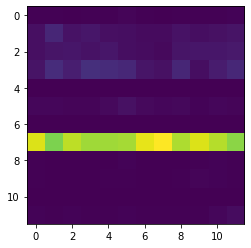

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3992 - acc: 0.1642 - val_loss: 2.5462 - val_acc: 0.0894
Epoch 22/22
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3602 - acc: 0.1874 - val_loss: 2.5489 - val_acc: 0.0885
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3904 - acc: 0.1675 - val_loss: 2.5311 - val_acc: 0.0985
Epoch 24/24
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3522 - acc: 0.1898 - val_loss: 2.5401 - val_acc: 0.1033
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3909 - acc: 0.1729 - val_loss: 2.5038 - val_acc: 0.1104
Epoch 26/26
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3498 - acc: 0.1933 - val_loss: 2.4901 - val_acc: 0.1142
Train on 2400

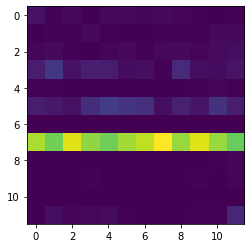

24000/24000 [==============================] - 7s 273us/sample


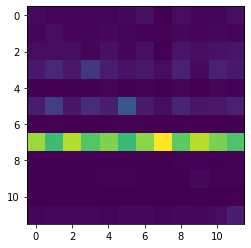

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3785 - acc: 0.1842 - val_loss: 2.4857 - val_acc: 0.1123
Epoch 32/32
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3386 - acc: 0.1980 - val_loss: 2.5011 - val_acc: 0.1121
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3753 - acc: 0.1808 - val_loss: 2.4993 - val_acc: 0.1148
Epoch 34/34
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3373 - acc: 0.1968 - val_loss: 2.5110 - val_acc: 0.1140
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 27s 1ms/sample - loss: 2.3680 - acc: 0.1861 - val_loss: 2.4891 - val_acc: 0.1213
Epoch 36/36
24000/24000 [==============================] - 24s 1ms/sample - loss: 2.3246 - acc: 0.2030 - val_loss: 2.4794 - val_acc: 0.1265
Train on 2400

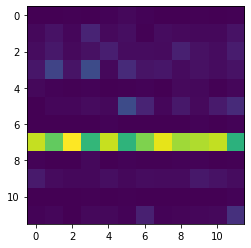

24000/24000 [==============================] - 6s 271us/sample


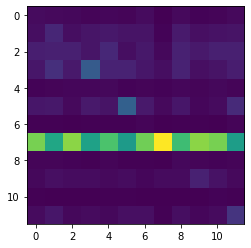

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3647 - acc: 0.1865 - val_loss: 2.4979 - val_acc: 0.1340
Epoch 42/42
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.3201 - acc: 0.2037 - val_loss: 2.5001 - val_acc: 0.1312
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3392 - acc: 0.2014 - val_loss: 2.5280 - val_acc: 0.1142
Epoch 44/44
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2970 - acc: 0.2185 - val_loss: 2.5170 - val_acc: 0.1238
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3360 - acc: 0.1985 - val_loss: 2.4972 - val_acc: 0.1398
Epoch 46/46
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2936 - acc: 0.2169 - val_loss: 2.5217 - val_acc: 0.1423
Train on 2400

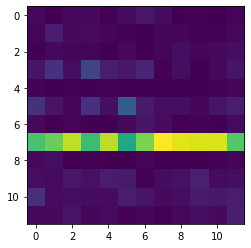

24000/24000 [==============================] - 6s 263us/sample


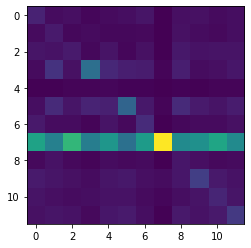

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3544 - acc: 0.1963 - val_loss: 2.4710 - val_acc: 0.1496
Epoch 52/52
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.3087 - acc: 0.2158 - val_loss: 2.4622 - val_acc: 0.1546
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3268 - acc: 0.2048 - val_loss: 2.5063 - val_acc: 0.1363
Epoch 54/54
24000/24000 [==============================] - 26s 1ms/sample - loss: 2.2859 - acc: 0.2225 - val_loss: 2.5301 - val_acc: 0.1400
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3132 - acc: 0.2130 - val_loss: 2.5208 - val_acc: 0.1429
Epoch 56/56
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2703 - acc: 0.2344 - val_loss: 2.5208 - val_acc: 0.1390
Train on 2400

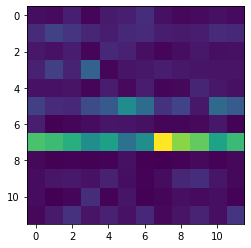

24000/24000 [==============================] - 6s 264us/sample


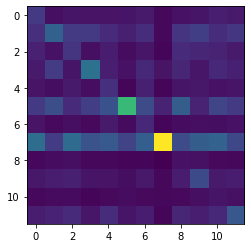

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3227 - acc: 0.2038 - val_loss: 2.4912 - val_acc: 0.1475
Epoch 62/62
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2762 - acc: 0.2195 - val_loss: 2.5497 - val_acc: 0.1398
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.3093 - acc: 0.2166 - val_loss: 2.5129 - val_acc: 0.1423
Epoch 64/64
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2684 - acc: 0.2327 - val_loss: 2.4961 - val_acc: 0.1550
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 28s 1ms/sample - loss: 2.2989 - acc: 0.2148 - val_loss: 2.4973 - val_acc: 0.1510
Epoch 66/66
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2551 - acc: 0.2338 - val_loss: 2.4806 - val_acc: 0.1571
Train on 2400

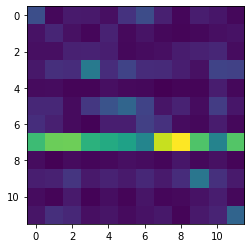

24000/24000 [==============================] - 6s 267us/sample


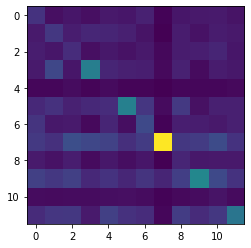

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2714 - acc: 0.2303 - val_loss: 2.4119 - val_acc: 0.1844
Epoch 72/72
24000/24000 [==============================] - 22s 929us/sample - loss: 2.2265 - acc: 0.2475 - val_loss: 2.4483 - val_acc: 0.1850
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2907 - acc: 0.2206 - val_loss: 2.5125 - val_acc: 0.1483
Epoch 74/74
24000/24000 [==============================] - 22s 922us/sample - loss: 2.2474 - acc: 0.2338 - val_loss: 2.5055 - val_acc: 0.1508
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2629 - acc: 0.2360 - val_loss: 2.4611 - val_acc: 0.1731
Epoch 76/76
24000/24000 [==============================] - 22s 928us/sample - loss: 2.2172 - acc: 0.2551 - val_loss: 2.4873 - val_acc: 0.1700
Train o

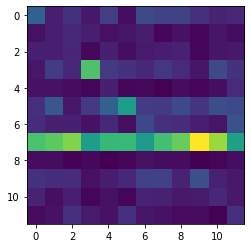

24000/24000 [==============================] - 5s 224us/sample


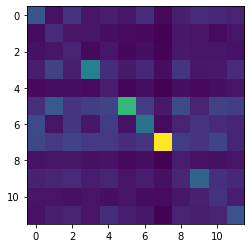

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2861 - acc: 0.2214 - val_loss: 2.4677 - val_acc: 0.1562
Epoch 82/82
24000/24000 [==============================] - 22s 928us/sample - loss: 2.2431 - acc: 0.2404 - val_loss: 2.4867 - val_acc: 0.1640
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2687 - acc: 0.2287 - val_loss: 2.4655 - val_acc: 0.1719
Epoch 84/84
24000/24000 [==============================] - 22s 931us/sample - loss: 2.2235 - acc: 0.2451 - val_loss: 2.4951 - val_acc: 0.1735
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2840 - acc: 0.2192 - val_loss: 2.4522 - val_acc: 0.1652
Epoch 86/86
24000/24000 [==============================] - 22s 925us/sample - loss: 2.2346 - acc: 0.2433 - val_loss: 2.4811 - val_acc: 0.1600
Train o

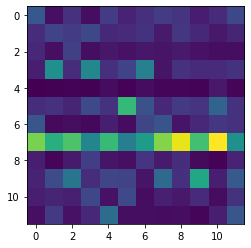

24000/24000 [==============================] - 5s 224us/sample


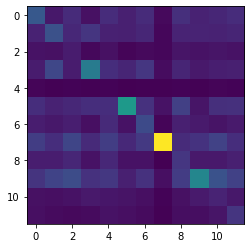

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2670 - acc: 0.2257 - val_loss: 2.4995 - val_acc: 0.1660
Epoch 92/92
24000/24000 [==============================] - 22s 933us/sample - loss: 2.2241 - acc: 0.2425 - val_loss: 2.4971 - val_acc: 0.1640
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2583 - acc: 0.2338 - val_loss: 2.5494 - val_acc: 0.1321
Epoch 94/94
24000/24000 [==============================] - 22s 933us/sample - loss: 2.2107 - acc: 0.2555 - val_loss: 2.5570 - val_acc: 0.1283
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 25s 1ms/sample - loss: 2.2901 - acc: 0.2159 - val_loss: 2.4239 - val_acc: 0.1704
Epoch 96/96
24000/24000 [==============================] - 22s 933us/sample - loss: 2.2426 - acc: 0.2368 - val_loss: 2.4545 - val_acc: 0.1719
Train o

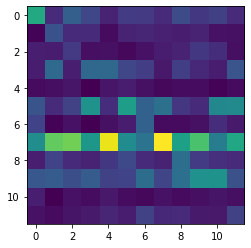

24000/24000 [==============================] - 5s 227us/sample


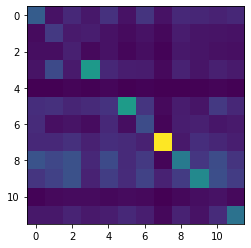

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_44 (Batc (None, 100, 25)           100       
_________________________________________________________________
lstm_22 (LSTM)               (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_45 (Batc (None, 100, 64)           256       
_________________________________________________________________
lstm_23 (LSTM)               (None, 64)                33024     
_________________________________________________________________
batch_normalization_46 (Batc (None, 64)                256       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_47 (Batc (None, 32)              

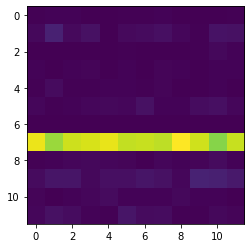

24000/24000 [==============================] - 7s 306us/sample


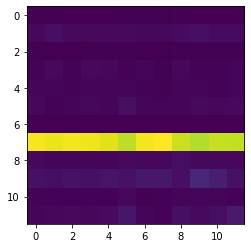

Train on 24000 samples, validate on 4800 samples
Epoch 11/12
24000/24000 [==============================] - 35s 1ms/sample - loss: 2.4223 - acc: 0.1573 - val_loss: 2.4880 - val_acc: 0.0944
Epoch 12/12
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.3752 - acc: 0.1803 - val_loss: 2.5015 - val_acc: 0.0935
Train on 24000 samples, validate on 4800 samples
Epoch 13/14
24000/24000 [==============================] - 35s 1ms/sample - loss: 2.4277 - acc: 0.1544 - val_loss: 2.4961 - val_acc: 0.1054
Epoch 14/14
24000/24000 [==============================] - 32s 1ms/sample - loss: 2.3793 - acc: 0.1742 - val_loss: 2.4912 - val_acc: 0.1056
Train on 24000 samples, validate on 4800 samples
Epoch 15/16
24000/24000 [==============================] - 35s 1ms/sample - loss: 2.4123 - acc: 0.1609 - val_loss: 2.4947 - val_acc: 0.0981
Epoch 16/16
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.3649 - acc: 0.1842 - val_loss: 2.4903 - val_acc: 0.1013
Train on 2400

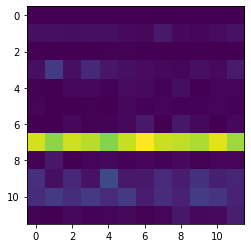

24000/24000 [==============================] - 8s 316us/sample


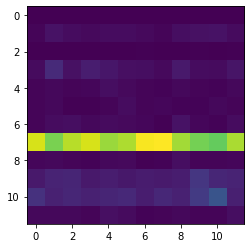

Train on 24000 samples, validate on 4800 samples
Epoch 21/22
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3710 - acc: 0.1861 - val_loss: 2.5159 - val_acc: 0.0977
Epoch 22/22
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.3223 - acc: 0.2068 - val_loss: 2.4943 - val_acc: 0.1029
Train on 24000 samples, validate on 4800 samples
Epoch 23/24
24000/24000 [==============================] - 35s 1ms/sample - loss: 2.3711 - acc: 0.1854 - val_loss: 2.4853 - val_acc: 0.1160
Epoch 24/24
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.3188 - acc: 0.2076 - val_loss: 2.4866 - val_acc: 0.1187
Train on 24000 samples, validate on 4800 samples
Epoch 25/26
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.3766 - acc: 0.1829 - val_loss: 2.4355 - val_acc: 0.1394
Epoch 26/26
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.3274 - acc: 0.2058 - val_loss: 2.4499 - val_acc: 0.1440
Train on 2400

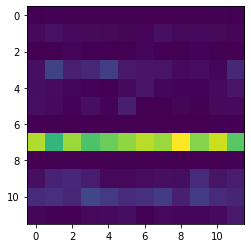

24000/24000 [==============================] - 8s 318us/sample


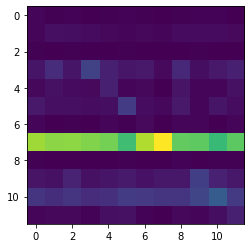

Train on 24000 samples, validate on 4800 samples
Epoch 31/32
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.3509 - acc: 0.1920 - val_loss: 2.4776 - val_acc: 0.1175
Epoch 32/32
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.2998 - acc: 0.2138 - val_loss: 2.4561 - val_acc: 0.1333
Train on 24000 samples, validate on 4800 samples
Epoch 33/34
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3312 - acc: 0.1980 - val_loss: 2.5386 - val_acc: 0.1027
Epoch 34/34
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.2779 - acc: 0.2217 - val_loss: 2.5634 - val_acc: 0.1025
Train on 24000 samples, validate on 4800 samples
Epoch 35/36
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3408 - acc: 0.1968 - val_loss: 2.5506 - val_acc: 0.1183
Epoch 36/36
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.2897 - acc: 0.2192 - val_loss: 2.5853 - val_acc: 0.1160
Train on 2400

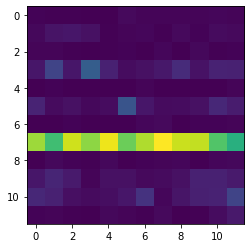

24000/24000 [==============================] - 8s 313us/sample


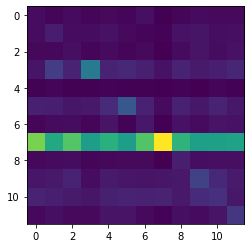

Train on 24000 samples, validate on 4800 samples
Epoch 41/42
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.3116 - acc: 0.2067 - val_loss: 2.5582 - val_acc: 0.1254
Epoch 42/42
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.2642 - acc: 0.2247 - val_loss: 2.5862 - val_acc: 0.1133
Train on 24000 samples, validate on 4800 samples
Epoch 43/44
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.3283 - acc: 0.1961 - val_loss: 2.5317 - val_acc: 0.1431
Epoch 44/44
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2808 - acc: 0.2142 - val_loss: 2.5281 - val_acc: 0.1494
Train on 24000 samples, validate on 4800 samples
Epoch 45/46
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.2940 - acc: 0.2207 - val_loss: 2.5674 - val_acc: 0.1148
Epoch 46/46
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2385 - acc: 0.2426 - val_loss: 2.6440 - val_acc: 0.1048
Train on 2400

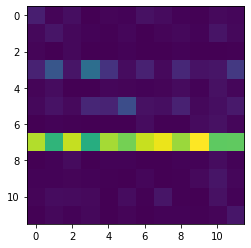

24000/24000 [==============================] - 7s 300us/sample


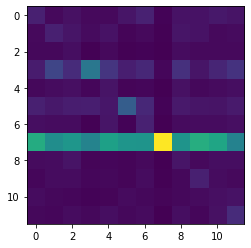

Train on 24000 samples, validate on 4800 samples
Epoch 51/52
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.2850 - acc: 0.2228 - val_loss: 2.5685 - val_acc: 0.1410
Epoch 52/52
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2271 - acc: 0.2397 - val_loss: 2.6847 - val_acc: 0.1262
Train on 24000 samples, validate on 4800 samples
Epoch 53/54
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3039 - acc: 0.2097 - val_loss: 2.6752 - val_acc: 0.1196
Epoch 54/54
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2507 - acc: 0.2288 - val_loss: 2.6569 - val_acc: 0.1317
Train on 24000 samples, validate on 4800 samples
Epoch 55/56
24000/24000 [==============================] - 31s 1ms/sample - loss: 2.3037 - acc: 0.2083 - val_loss: 2.6479 - val_acc: 0.1233
Epoch 56/56
24000/24000 [==============================] - 29s 1ms/sample - loss: 2.2516 - acc: 0.2331 - val_loss: 2.5839 - val_acc: 0.1358
Train on 2400

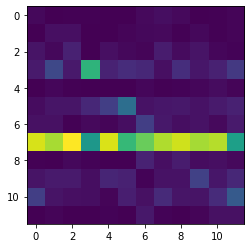

24000/24000 [==============================] - 7s 306us/sample


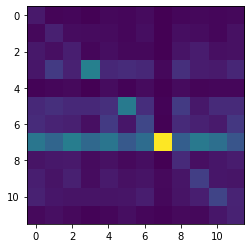

Train on 24000 samples, validate on 4800 samples
Epoch 61/62
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.2656 - acc: 0.2282 - val_loss: 2.5681 - val_acc: 0.1421
Epoch 62/62
24000/24000 [==============================] - 34s 1ms/sample - loss: 2.2090 - acc: 0.2489 - val_loss: 2.6180 - val_acc: 0.1435
Train on 24000 samples, validate on 4800 samples
Epoch 63/64
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.2840 - acc: 0.2184 - val_loss: 2.5190 - val_acc: 0.1513
Epoch 64/64
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.2253 - acc: 0.2418 - val_loss: 2.5414 - val_acc: 0.1460
Train on 24000 samples, validate on 4800 samples
Epoch 65/66
24000/24000 [==============================] - 37s 2ms/sample - loss: 2.2794 - acc: 0.2226 - val_loss: 2.5870 - val_acc: 0.1281
Epoch 66/66
24000/24000 [==============================] - 34s 1ms/sample - loss: 2.2227 - acc: 0.2419 - val_loss: 2.5741 - val_acc: 0.1396
Train on 2400

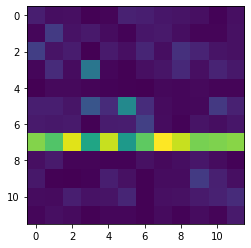

24000/24000 [==============================] - 8s 320us/sample


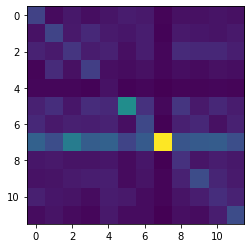

Train on 24000 samples, validate on 4800 samples
Epoch 71/72
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2500 - acc: 0.2335 - val_loss: 2.6078 - val_acc: 0.1312
Epoch 72/72
24000/24000 [==============================] - 34s 1ms/sample - loss: 2.1877 - acc: 0.2591 - val_loss: 2.6052 - val_acc: 0.1310
Train on 24000 samples, validate on 4800 samples
Epoch 73/74
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2454 - acc: 0.2370 - val_loss: 2.4676 - val_acc: 0.1515
Epoch 74/74
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1874 - acc: 0.2575 - val_loss: 2.4876 - val_acc: 0.1504
Train on 24000 samples, validate on 4800 samples
Epoch 75/76
24000/24000 [==============================] - 36s 1ms/sample - loss: 2.2529 - acc: 0.2316 - val_loss: 2.4304 - val_acc: 0.1867
Epoch 76/76
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1961 - acc: 0.2555 - val_loss: 2.4842 - val_acc: 0.1827
Train on 2400

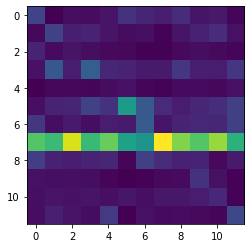

24000/24000 [==============================] - 8s 320us/sample


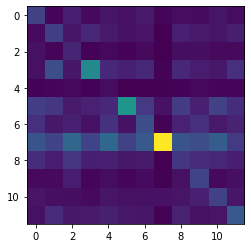

Train on 24000 samples, validate on 4800 samples
Epoch 81/82
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2543 - acc: 0.2337 - val_loss: 2.4834 - val_acc: 0.1654
Epoch 82/82
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1956 - acc: 0.2523 - val_loss: 2.4560 - val_acc: 0.1644
Train on 24000 samples, validate on 4800 samples
Epoch 83/84
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2251 - acc: 0.2452 - val_loss: 2.4698 - val_acc: 0.1600
Epoch 84/84
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1616 - acc: 0.2697 - val_loss: 2.5022 - val_acc: 0.1521
Train on 24000 samples, validate on 4800 samples
Epoch 85/86
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2094 - acc: 0.2463 - val_loss: 2.4495 - val_acc: 0.1988
Epoch 86/86
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1499 - acc: 0.2673 - val_loss: 2.4986 - val_acc: 0.1915
Train on 2400

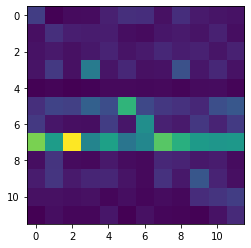

24000/24000 [==============================] - 8s 324us/sample


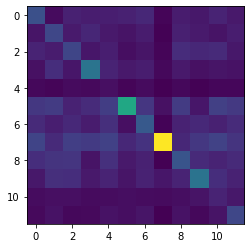

Train on 24000 samples, validate on 4800 samples
Epoch 91/92
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2284 - acc: 0.2474 - val_loss: 2.4889 - val_acc: 0.1577
Epoch 92/92
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1711 - acc: 0.2697 - val_loss: 2.4913 - val_acc: 0.1642
Train on 24000 samples, validate on 4800 samples
Epoch 93/94
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2298 - acc: 0.2429 - val_loss: 2.5238 - val_acc: 0.1404
Epoch 94/94
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1721 - acc: 0.2648 - val_loss: 2.5190 - val_acc: 0.1521
Train on 24000 samples, validate on 4800 samples
Epoch 95/96
24000/24000 [==============================] - 36s 2ms/sample - loss: 2.2260 - acc: 0.2489 - val_loss: 2.5409 - val_acc: 0.1473
Epoch 96/96
24000/24000 [==============================] - 33s 1ms/sample - loss: 2.1702 - acc: 0.2695 - val_loss: 2.5670 - val_acc: 0.1521
Train on 2400

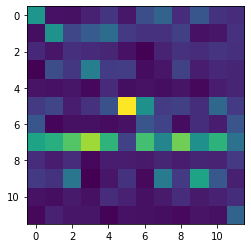

24000/24000 [==============================] - 8s 322us/sample


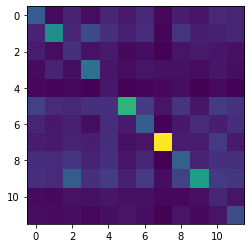

In [6]:
train_n = 100
sample_n = train_n * 20
val_n  = int(train_n/5)
valsample_n = val_n * 20
iterations = 50
epochs = 2
learn_rate = 0.001
batch_size = 4096
for D in [32]:
    for LSTM2 in [16, 32, 64]:
        for LSTM1 in [8, 16, 32, 64]:
            model = keras.Sequential()
            model.add(BatchNormalization(input_shape=input_shape))

            model.add(LSTM(LSTM1, 
                           input_shape=input_shape, 
                           return_sequences = True
                          ))
            model.add(BatchNormalization())
            model.add(LSTM(LSTM2, 
                           return_sequences = False,
                           go_backwards = True
                          ))
            model.add(BatchNormalization())
            model.add(Dense(D, activation= "relu"))
            model.add(BatchNormalization())
            model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
            adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
            model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
            gc.collect()
            print(model.summary())
            desc = str(LSTM1) + "_" + str(LSTM2) + "_" + str(D)
            log_dir = os.path.join(
                "logs",
                "10sec_10sample",
                desc
            )
            model_dir = os.path.join(
                "pickle",
                desc
            )


            tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            model = module.train(iterations, learn_rate, train_n, sample_n, val_n, valsample_n, seconds, samplerate,
                            countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                            model, batch_size)
            del model, model_dir, log_dir, desc, adam
            gc.collect()

## Obtain the Confusion Matrix

In [6]:
train_n = 100
sample_n = train_n * 20
val_n  = int(train_n/5)
valsample_n = val_n * 20
iterations = 50
epochs = 2
learn_rate = 0.001
batch_size = 4096
for D in [16]:
    for LSTM2 in [64]:
        for LSTM1 in [64]:
            model = keras.Sequential()
            model.add(BatchNormalization(input_shape=input_shape))

            model.add(LSTM(LSTM1, 
                           input_shape=input_shape, 
                           return_sequences = True
                          ))
            model.add(BatchNormalization())
            model.add(LSTM(LSTM2, 
                           return_sequences = False,
                           go_backwards = True
                          ))
            model.add(BatchNormalization())
            model.add(Dense(D, activation= "relu"))
            model.add(BatchNormalization())
            model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
            adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
            model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
            gc.collect()
            print(model.summary())
            desc = str(LSTM1) + "_" + str(LSTM2) + "_" + str(D)
            log_dir = os.path.join(
                "logs",
                "10sec_10sample",
                desc
            )
            model_dir = os.path.join(
                "pickle",
                desc
            )
            model.load_weights(model_dir, by_name=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 100, 25)           100       
_________________________________________________________________
lstm (LSTM)                  (None, 100, 64)           23040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 64)           256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                6

In [9]:
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(train_n, sample_n, val_n, valsample_n, seconds, samplerate, countriesOfInterest, enc)

In [26]:
preds = model.predict(val_x, batch_size = batch_size, verbose = 1)
conf_mat = confusion_matrix(
    enc.inverse_transform(val_labels),
    enc.inverse_transform(preds),
    labels = countriesOfInterest)

4800/4800 [==============================] - 1s 235us/sample


In [27]:
print(conf_mat.sum(axis = 1))
print(val_labels.sum(axis = 0))
# rows are true labels, columns are predictions

[400 400 400 400 400 400 400 400 400 400 400 400]
[400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.]


In [29]:
conf_mat = pd.DataFrame(conf_mat, index = countriesOfInterest, columns = countriesOfInterest)
conf_mat.to_csv("64_64_16_conf_mat.csv")

In [ ]:
model = keras.Sequential()
model.add(BatchNormalization(input_shape=(train_x.shape[1], train_x.shape[2])))

model.add(LSTM(16, 
               input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = True,
          #     recurrent_dropout = .5,
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
model.add(LSTM(32, 
             #  input_shape=(train_x.shape[1], train_x.shape[2]), 
               return_sequences = False,
  #             recurrent_dropout = .5,
               go_backwards = True
          #     kernel_regularizer=regularizers.l2(0.01),
              ))
model.add(BatchNormalization())
#model.add(Dropout(.5))
model.add(Dense(16, activation= "relu"))
model.add(BatchNormalization())
#model.add(Dropout(.5))
model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
del train_x, train_labels, val_x, val_labels, class_weights
gc.collect()
print(model.summary())

In [ ]:
#add recurrent dropout to add noise to duration
desc = "normin_LSTM16_32_Out_1Step_001LR_amsgrad"
log_dir = os.path.join(
    "logs",
    "Overfit",
    desc
)
model_dir = os.path.join(
    "pickle",
    "save"
)

train_n = 100
sample_n = 8000
val_n  = int(2*train_n/5)
valsample_n = 1000
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs = 1
iterations = 40
learn_rate = 0.001
batch_size = 4096
model = module.train(iterations, learn_rate, train_n, sample_n, val_n, valsample_n, seconds, samplerate,
                countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                model, batch_size)